# Домашнее задание №2
### Дисциплина: Современные методы анализа данных
### Тема: NumPy, Pandas, визуализация данных
### Автор: Ермакова Любовь
### Дата: 2025-08-23


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.style.use("seaborn-v0_8")
sns.set_theme(palette="pastel")

## 1. Загрузка данных и описание

#### Источник данных
Данные взяты с Kaggle: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings

#### Описание переменных:

- Name: Название видеоигры
- Platform: Игровая платформа (PS4, Xbox One, PC, Nintendo Switch и т.д.)
- Year_of_Release: Год выпуска игры
- Genre: Жанр игры (Action, Sports, RPG, Strategy и т.д.)
- Publisher: Издатель игры (Nintendo, EA, Activision и т.д.)
- NA_Sales: Продажи в Северной Америке (в миллионах копий)
- EU_Sales: Продажи в Европе (в миллионах копий)
- JP_Sales: Продажи в Японии (в миллионах копий)
- Other_Sales: Продажи в других регионах (в миллионах копий)
- Global_Sales: Глобальные продажи (сумма всех регионов, в миллионах копий)
- Critic_Score: Оценка критиков (шкала 0-100)
- Critic_Count: Количество критиков, поставивших оценку
- User_Score: Оценка пользователей (шкала 0-10)
- User_Count: Количество пользователей, поставивших оценку
- Developer: Разработчик игры
- Rating: Возрастной рейтинг (E - Everyone, M - Mature, T - Teen и т.д.)

#### Исследовательские цели:

1. Изучить факторы, влияющие на успешность видеоигр
2. Проанализировать различия в продажах по регионам
3. Выявить тренды в игровой индустрии по годам
4. Исследовать связь между оценками критиков/пользователей и продажами


In [8]:
df = pd.read_csv("Video_Games_Sales.csv")
display(df.head())

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Первичный анализ данных

In [10]:
print(f"Размерность датасета: {df.shape}")
print(f"Количество наблюдений: {df.shape[0]}")
print(f"Количество переменных: {df.shape[1]}")
print("\n" + "="*50)

display(df.info())
print("="*50)
display(df.describe(include="all"))

Размерность датасета: (16719, 16)
Количество наблюдений: 16719
Количество переменных: 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating        

None

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


#### Первичные наблюдения:

- Датасет содержит более 100 наблюдений ✓
- Присутствуют числовые переменные: Year_of_Release, различные Sales, Critic_Score, User_Score ✓
- Присутствуют категориальные переменные: Platform, Genre, Publisher, Rating ✓
- Данные охватывают период с 1980-х по 2020 год ✓

## 3. Предобработка данных

### 3.1 Анализ пропущенных значений


Анализ пропущенных значений:


,Пропущенные значения,Процент от общего
User_Count,9129,54.60
Critic_Score,8582,51.33
Critic_Count,8582,51.33
Rating,6769,40.49
User_Score,6704,40.10
Developer,6623,39.61
Year_of_Release,269,1.61
Publisher,54,0.32
Name,2,0.01
Genre,2,0.01


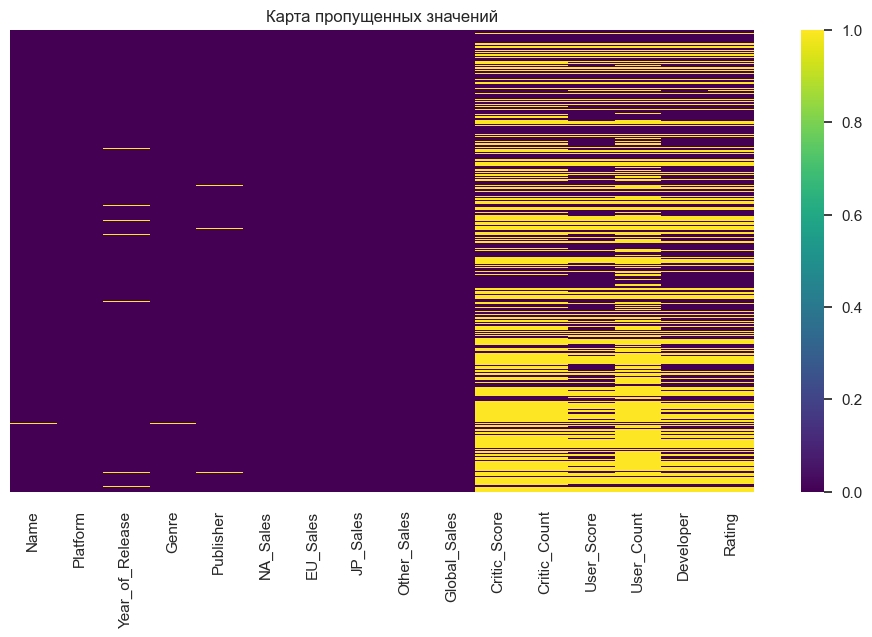

In [14]:
print("Анализ пропущенных значений:")
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Пропущенные значения': missing_data,
    'Процент от общего': missing_percent
})

display(missing_df[missing_df['Пропущенные значения'] > 0])

# Визуализация пропусков
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Карта пропущенных значений')
plt.show()

### 3.2 Анализ дубликатов

In [17]:
print(f"Количество дубликатов: {df.duplicated().sum()}")
print(f"Количество дубликатов по названию игры: {df['Name'].duplicated().sum()}")

# Проверим дубликаты по названию и платформе
duplicate_games = df[df.duplicated(subset=['Name', 'Platform'], keep=False)]
if len(duplicate_games) > 0:
    print(f"Игры с одинаковыми названиями на разных платформах: {len(duplicate_games)}")
    display(duplicate_games[['Name', 'Platform', 'Year_of_Release']].head())

Количество дубликатов: 0
Количество дубликатов по названию игры: 5156
Игры с одинаковыми названиями на разных платформах: 10


,Name,Platform,Year_of_Release
604,Madden NFL 13,PS3,2012.0
659,NaN,GEN,1993.0
1190,Need for Speed: Most Wanted,X360,2012.0
1591,Need for Speed: Most Wanted,X360,2005.0
1745,Sonic the Hedgehog,PS3,2006.0


### 3.3 Обработка пропущенных значений

In [20]:
# Преобразование User_Score в числовой формат (tbd → NaN)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# Заполнение Year_of_Release модой (самый частый год)
mode_year = df['Year_of_Release'].mode()[0]
print(f"Заполняем пропуски в Year_of_Release значением: {mode_year}")
df['Year_of_Release'] = df['Year_of_Release'].fillna(mode_year)

# Удаляем строки без Global_Sales (ключевая переменная для анализа)
initial_count = len(df)
df.dropna(subset=['Global_Sales'], inplace=True)
print(f"Удалено строк без Global_Sales: {initial_count - len(df)}")

# Проверяем результат
print(f"\nПропущенные значения после обработки:")
display(df.isnull().sum().sort_values(ascending=False).head(10))

Заполняем пропуски в Year_of_Release значением: 2008.0
Удалено строк без Global_Sales: 0

Пропущенные значения после обработки:


User_Score      9129
User_Count      9129
Critic_Score    8582
Critic_Count    8582
Rating          6769
Developer       6623
Publisher         54
Name               2
Genre              2
Platform           0
dtype: int64

### 3.4 Анализ выбросов

In [23]:
# Анализ выбросов в Global_Sales
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Global_Sales'] < lower_bound) | (df['Global_Sales'] > upper_bound)]
print(f"Количество выбросов в Global_Sales: {len(outliers)}")
print(f"Это составляет {len(outliers)/len(df)*100:.1f}% от всех данных")

# Топ-10 самых продаваемых игр (потенциальные выбросы)
top_sales = df.nlargest(10, 'Global_Sales')[['Name', 'Platform', 'Genre', 'Global_Sales']]
print("\nТоп-10 самых продаваемых игр:")
display(top_sales)

Количество выбросов в Global_Sales: 1892
Это составляет 11.3% от всех данных

Топ-10 самых продаваемых игр:


,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.53
1,Super Mario Bros.,NES,Platform,40.24
2,Mario Kart Wii,Wii,Racing,35.52
3,Wii Sports Resort,Wii,Sports,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37
5,Tetris,GB,Puzzle,30.26
6,New Super Mario Bros.,DS,Platform,29.80
7,Wii Play,Wii,Misc,28.92
8,New Super Mario Bros. Wii,Wii,Platform,28.32
9,Duck Hunt,NES,Shooter,28.31


## 4. Анализ переменных
### 4.1 Числовые переменные

Описательная статистика числовых переменных:


,Year_of_Release,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Critic_Score,User_Score
count,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,7590.000000
mean,2006.511693,0.533543,0.263330,0.145025,0.077602,68.967679,7.125046
std,5.834610,1.547935,0.813514,0.503283,0.308818,13.938165,1.500006
min,1980.000000,0.010000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.060000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2008.000000,0.170000,0.080000,0.020000,0.000000,71.000000,7.500000
75%,2010.000000,0.470000,0.240000,0.110000,0.040000,79.000000,8.200000
max,2020.000000,82.530000,41.360000,28.960000,10.220000,98.000000,9.700000


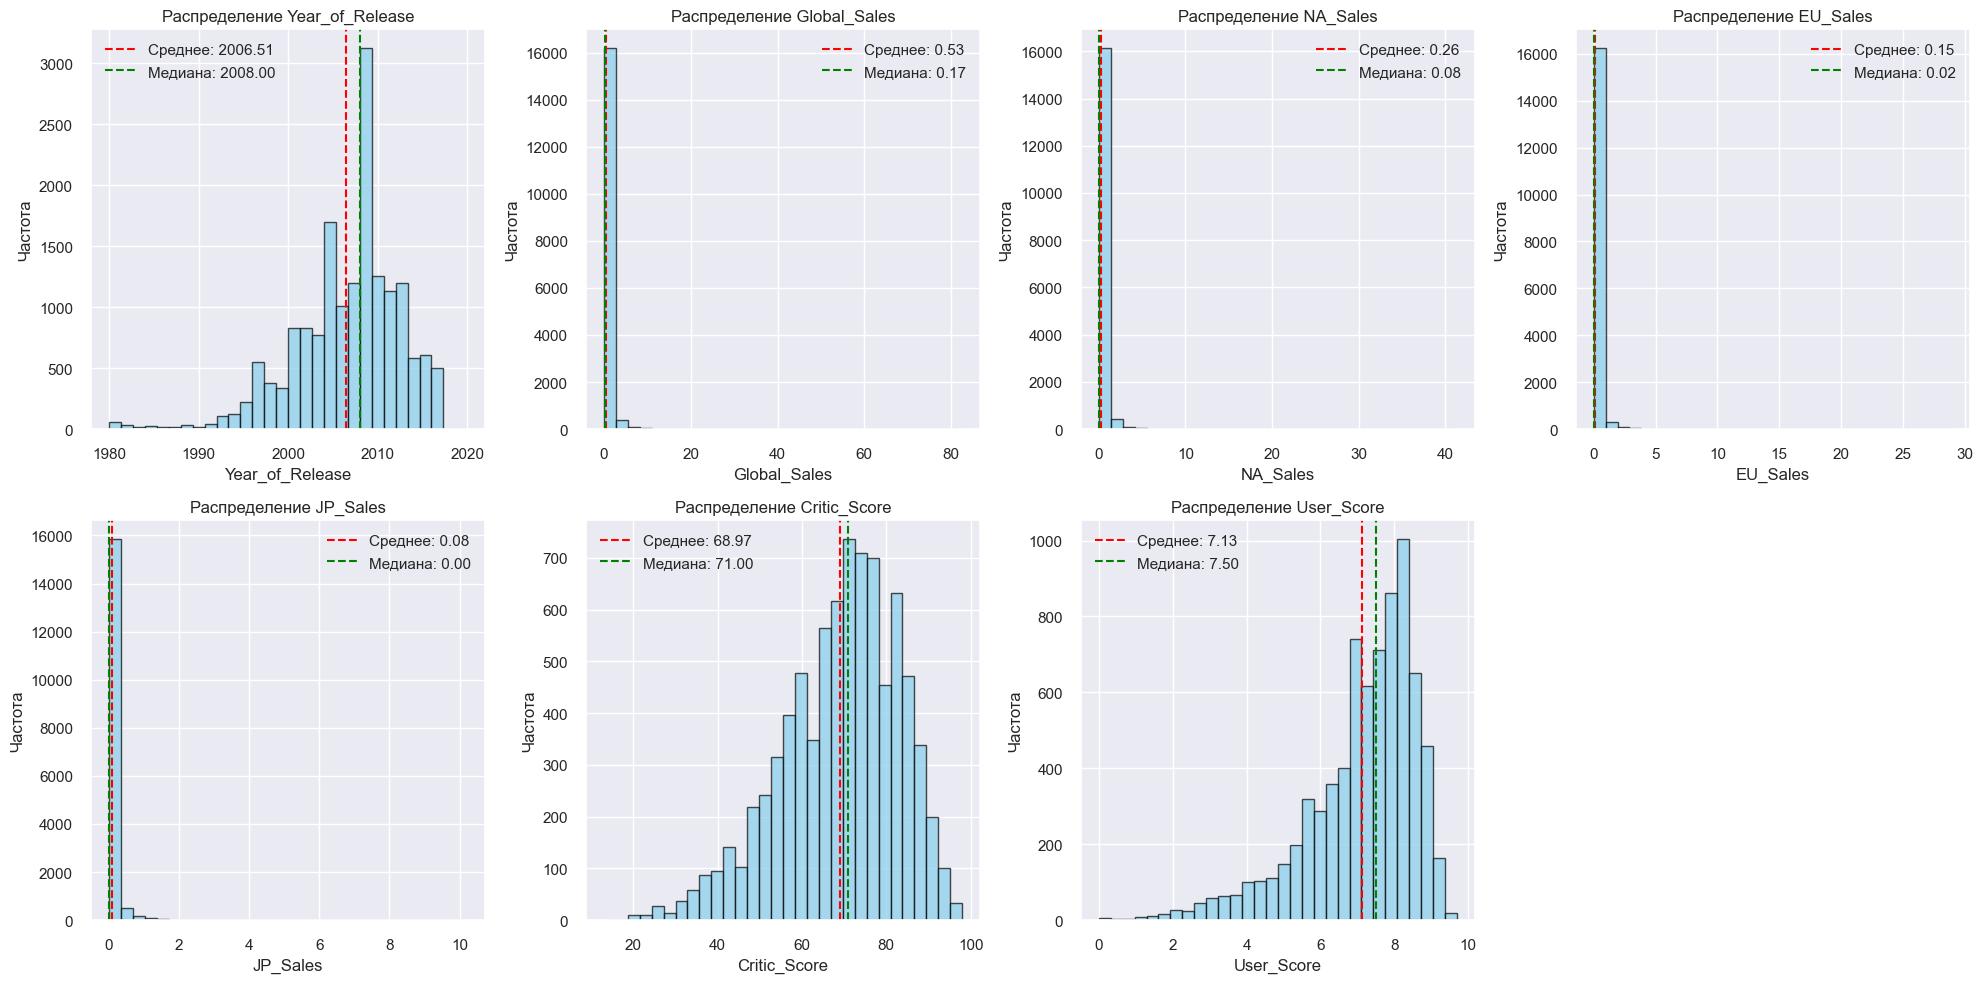


Анализ формы распределений:


,Переменная,Асимметрия,Эксцесс
0,Year_of_Release,-0.991743,1.855514
1,Global_Sales,17.377990,604.098261
2,NA_Sales,18.773790,648.701210
3,EU_Sales,18.852939,755.672941
4,JP_Sales,11.208769,194.311548
5,Critic_Score,-0.613646,0.142851
6,User_Score,-1.254615,1.721791


In [25]:
# Определяем числовые переменные для анализа
numeric_cols = ['Year_of_Release', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 
                'Critic_Score', 'User_Score']

print("Описательная статистика числовых переменных:")
display(df[numeric_cols].describe())

# Детальный анализ каждой числовой переменной
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        # Гистограмма
        axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Распределение {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Частота')
        
        # Добавляем статистики на график
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Среднее: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Медиана: {median_val:.2f}')
        axes[i].legend()

# Удаляем лишние подграфики
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Анализ асимметрии и эксцесса
print("\nАнализ формы распределений:")
skew_kurt_df = pd.DataFrame({
    'Переменная': numeric_cols,
    'Асимметрия': [df[col].skew() for col in numeric_cols],
    'Эксцесс': [df[col].kurtosis() for col in numeric_cols]
})
display(skew_kurt_df)

#### Выводы по числовым переменным:

- Global_Sales: Сильная правосторонняя асимметрия - большинство игр продаются плохо, немногие - очень хорошо
- Year_of_Release: Основная масса игр выпущена после 2000 года
- Critic_Score: Нормальное распределение с центром около 70 баллов
- User_Score: Более равномерное распределение оценок пользователей

### 4.2 Категориальные переменные


Анализ переменной: Platform
Количество уникальных значений: 31
Наиболее частое значение: PS2
Процент пропущенных значений: 0.0%

Топ-10 категорий:


Platform
PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: count, dtype: int64

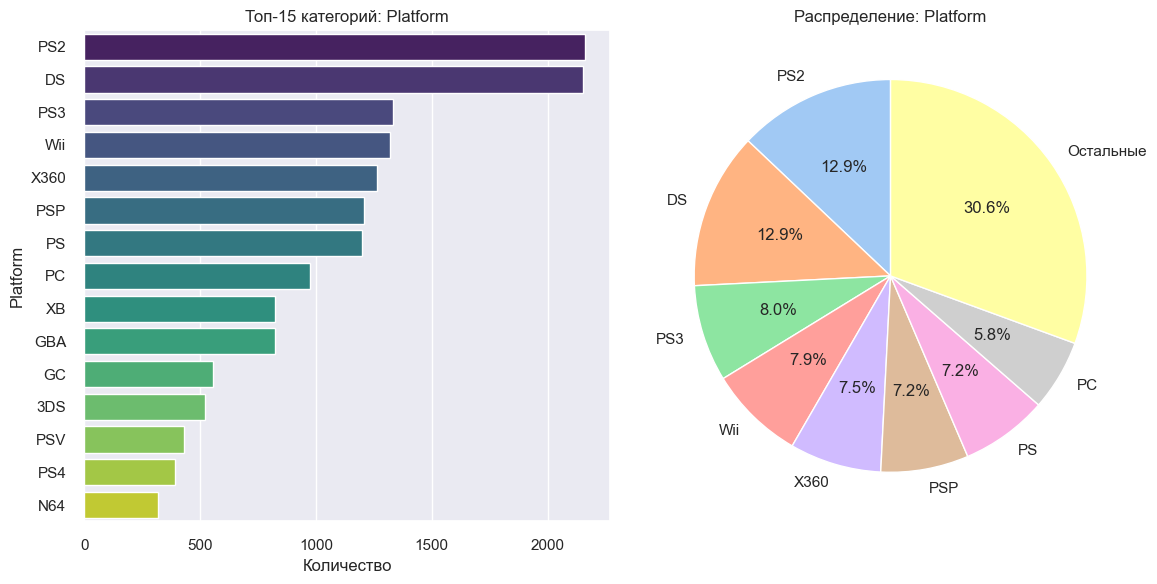


Анализ переменной: Genre
Количество уникальных значений: 12
Наиболее частое значение: Action
Процент пропущенных значений: 0.0%

Топ-10 категорий:


Genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Name: count, dtype: int64

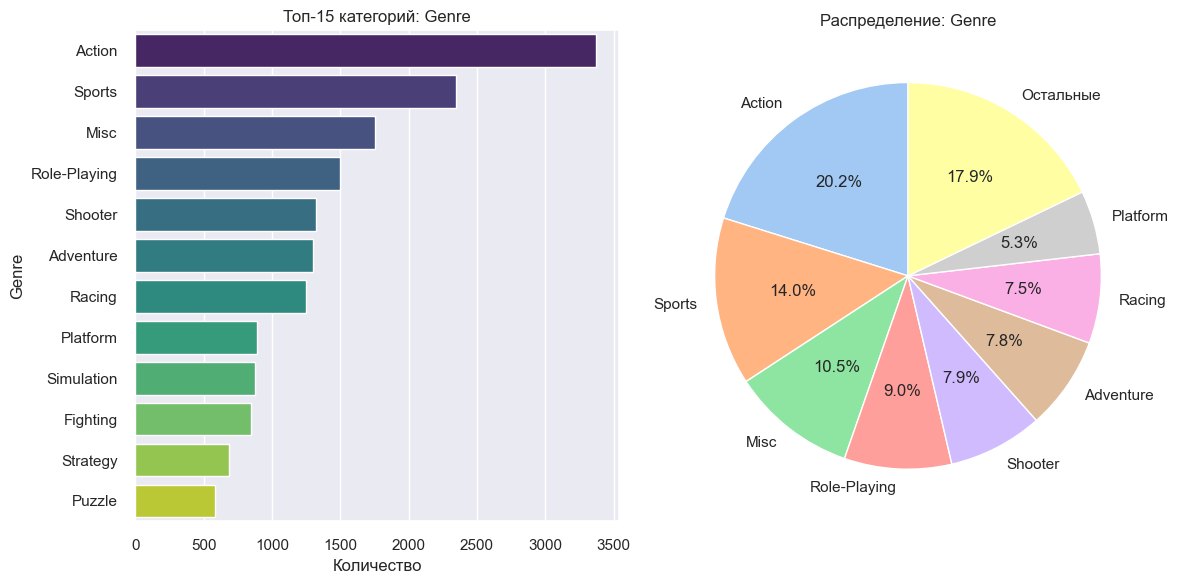


Анализ переменной: Publisher
Количество уникальных значений: 581
Наиболее частое значение: Electronic Arts
Процент пропущенных значений: 0.3%

Топ-10 категорий:


Publisher
Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             638
Take-Two Interactive             422
Name: count, dtype: int64

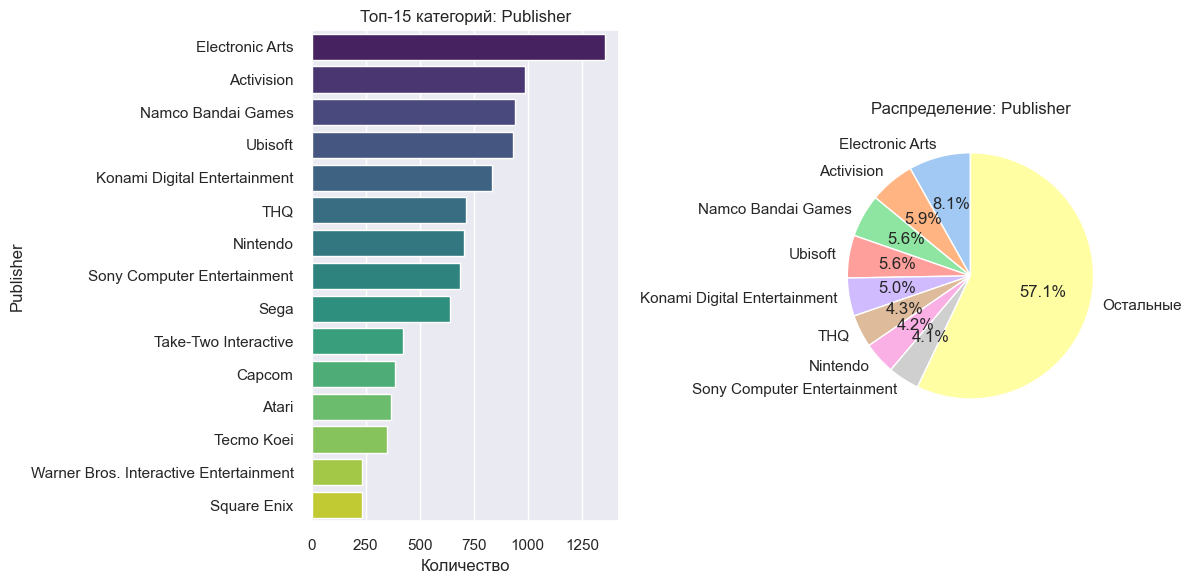


Анализ переменной: Rating
Количество уникальных значений: 8
Наиболее частое значение: E
Процент пропущенных значений: 40.5%

Топ-10 категорий:


Rating
E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

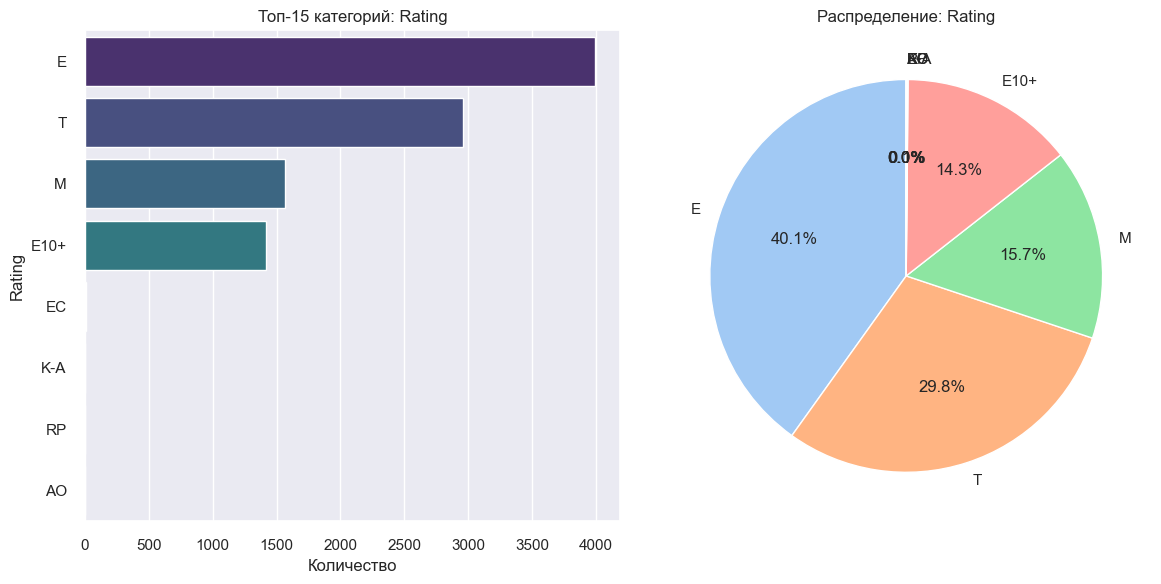

In [28]:
categorical_cols = ['Platform', 'Genre', 'Publisher', 'Rating']

# Анализ каждой категориальной переменной
for col in categorical_cols:
    print(f"\n{'='*50}")
    print(f"Анализ переменной: {col}")
    print(f"{'='*50}")
    
    # Основная статистика
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Наиболее частое значение: {df[col].mode()[0]}")
    print(f"Процент пропущенных значений: {df[col].isnull().mean()*100:.1f}%")
    
    # Топ-10 категорий
    top_10 = df[col].value_counts().head(10)
    print(f"\nТоп-10 категорий:")
    display(top_10)
    
    # Визуализация
    plt.figure(figsize=(12, 6))
    
    # Барplot для топ-15
    top_15 = df[col].value_counts().head(15)
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_15.values, y=top_15.index, palette='viridis')
    plt.title(f'Топ-15 категорий: {col}')
    plt.xlabel('Количество')
    
    # Pie chart для топ-8
    plt.subplot(1, 2, 2)
    top_8 = df[col].value_counts().head(8)
    other_count = df[col].value_counts().iloc[8:].sum()
    
    if other_count > 0:
        top_8['Остальные'] = other_count
    
    plt.pie(top_8.values, labels=top_8.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Распределение: {col}')
    
    plt.tight_layout()
    plt.show()

## 5. Анализ взаимодействий
### 5.1 Числовая & числовая

ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 1:
Существует ли связь между оценками критиков и глобальными продажами игр?
Коэффициент корреляции Пирсона: 0.245
P-значение: 0.000000
Статистическая значимость: Да


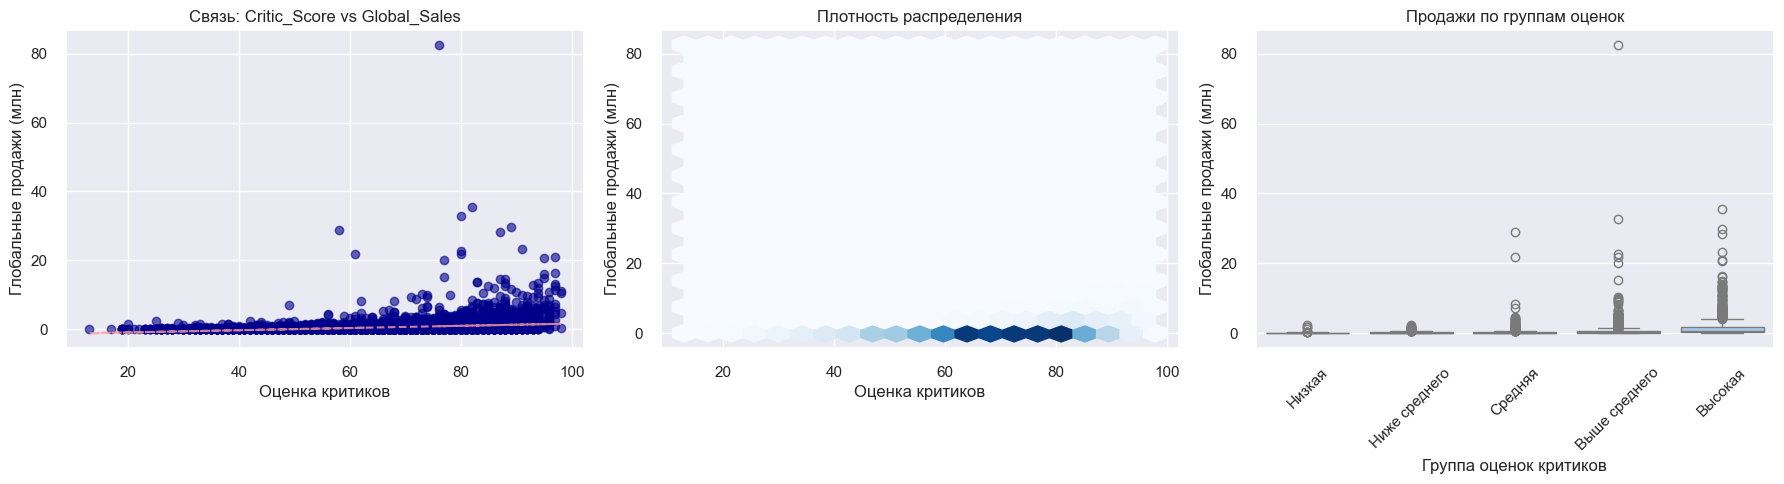


Анализ продаж по квантилям оценок критиков:


,count,mean,median,std
Critic_Score,,,,
Q1,2069,0.271150,0.14,0.737043
Q2,2203,0.393182,0.19,0.773804
Q3,1853,0.639072,0.30,2.170778
Q4,2012,1.488713,0.67,2.623170


In [30]:
print("="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 1:")
print("Существует ли связь между оценками критиков и глобальными продажами игр?")
print("="*60)

# Корреляционный анализ
correlation = df['Critic_Score'].corr(df['Global_Sales'])
print(f"Коэффициент корреляции Пирсона: {correlation:.3f}")

# Статистический тест
clean_data = df[['Critic_Score', 'Global_Sales']].dropna()
stat, p_value = stats.pearsonr(clean_data['Critic_Score'], clean_data['Global_Sales'])
print(f"P-значение: {p_value:.6f}")
print(f"Статистическая значимость: {'Да' if p_value < 0.05 else 'Нет'}")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plot
axes[0].scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.6, color='darkblue')
axes[0].set_xlabel('Оценка критиков')
axes[0].set_ylabel('Глобальные продажи (млн)')
axes[0].set_title('Связь: Critic_Score vs Global_Sales')

# Добавляем линию тренда
z = np.polyfit(clean_data['Critic_Score'], clean_data['Global_Sales'], 1)
p = np.poly1d(z)
axes[0].plot(clean_data['Critic_Score'], p(clean_data['Critic_Score']), "r--", alpha=0.8)

# Hexbin plot для плотности
axes[1].hexbin(df['Critic_Score'], df['Global_Sales'], gridsize=20, cmap='Blues')
axes[1].set_xlabel('Оценка критиков')
axes[1].set_ylabel('Глобальные продажи (млн)')
axes[1].set_title('Плотность распределения')

# Box plot по группам оценок
df['Critic_Score_Group'] = pd.cut(df['Critic_Score'], bins=5, labels=['Низкая', 'Ниже среднего', 'Средняя', 'Выше среднего', 'Высокая'])
sns.boxplot(data=df, x='Critic_Score_Group', y='Global_Sales', ax=axes[2])
axes[2].set_xlabel('Группа оценок критиков')
axes[2].set_ylabel('Глобальные продажи (млн)')
axes[2].set_title('Продажи по группам оценок')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Дополнительный анализ по квантилям
print("\nАнализ продаж по квантилям оценок критиков:")
quantile_analysis = df.groupby(pd.qcut(df['Critic_Score'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4']))['Global_Sales'].agg(['count', 'mean', 'median', 'std'])
display(quantile_analysis)


ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 2:
Как связаны оценки критиков и пользователей?
Корреляция Critic_Score vs User_Score: 0.581


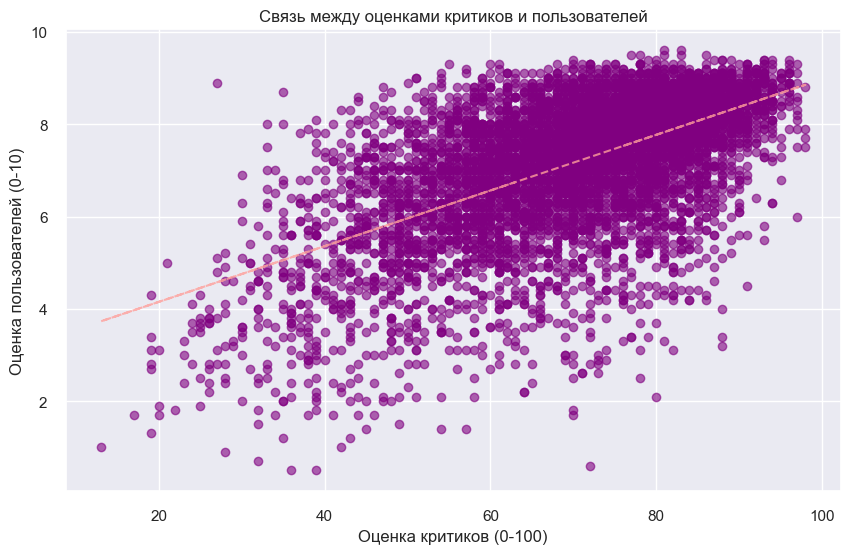

In [32]:
print("\n" + "="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 2:")
print("Как связаны оценки критиков и пользователей?")
print("="*60)

# Корреляция между Critic_Score и User_Score
correlation_users = df['Critic_Score'].corr(df['User_Score'])
print(f"Корреляция Critic_Score vs User_Score: {correlation_users:.3f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Critic_Score'], df['User_Score'], alpha=0.6, color='purple')
plt.xlabel('Оценка критиков (0-100)')
plt.ylabel('Оценка пользователей (0-10)')
plt.title('Связь между оценками критиков и пользователей')

# Добавляем линию тренда
clean_data_scores = df[['Critic_Score', 'User_Score']].dropna()
z = np.polyfit(clean_data_scores['Critic_Score'], clean_data_scores['User_Score'], 1)
p = np.poly1d(z)
plt.plot(clean_data_scores['Critic_Score'], p(clean_data_scores['Critic_Score']), "r--", alpha=0.8)

plt.show()

### 5.2 Числовая & категориальная

ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 3:
Различаются ли продажи игр по жанрам? Какие жанры наиболее успешны?
Статистика продаж по жанрам:


,count,mean,median,std,min,max,sum
Genre,,,,,,,
Action,3370,0.518,0.19,1.145,0.01,21.04,1745.27
Sports,2348,0.567,0.22,2.084,0.01,82.53,1332.00
Shooter,1323,0.796,0.23,1.816,0.01,28.31,1052.94
Role-Playing,1500,0.623,0.18,1.709,0.01,31.37,934.40
Platform,888,0.933,0.27,2.574,0.01,40.24,828.08
Misc,1750,0.459,0.16,1.305,0.01,28.92,803.18
Racing,1249,0.584,0.19,1.657,0.01,35.52,728.90
Fighting,849,0.527,0.20,0.952,0.01,12.84,447.48
Simulation,874,0.447,0.15,1.186,0.01,24.67,390.42



ANOVA F-статистика: 18.747
P-значение: 0.000000
Статистически значимые различия между жанрами: Да


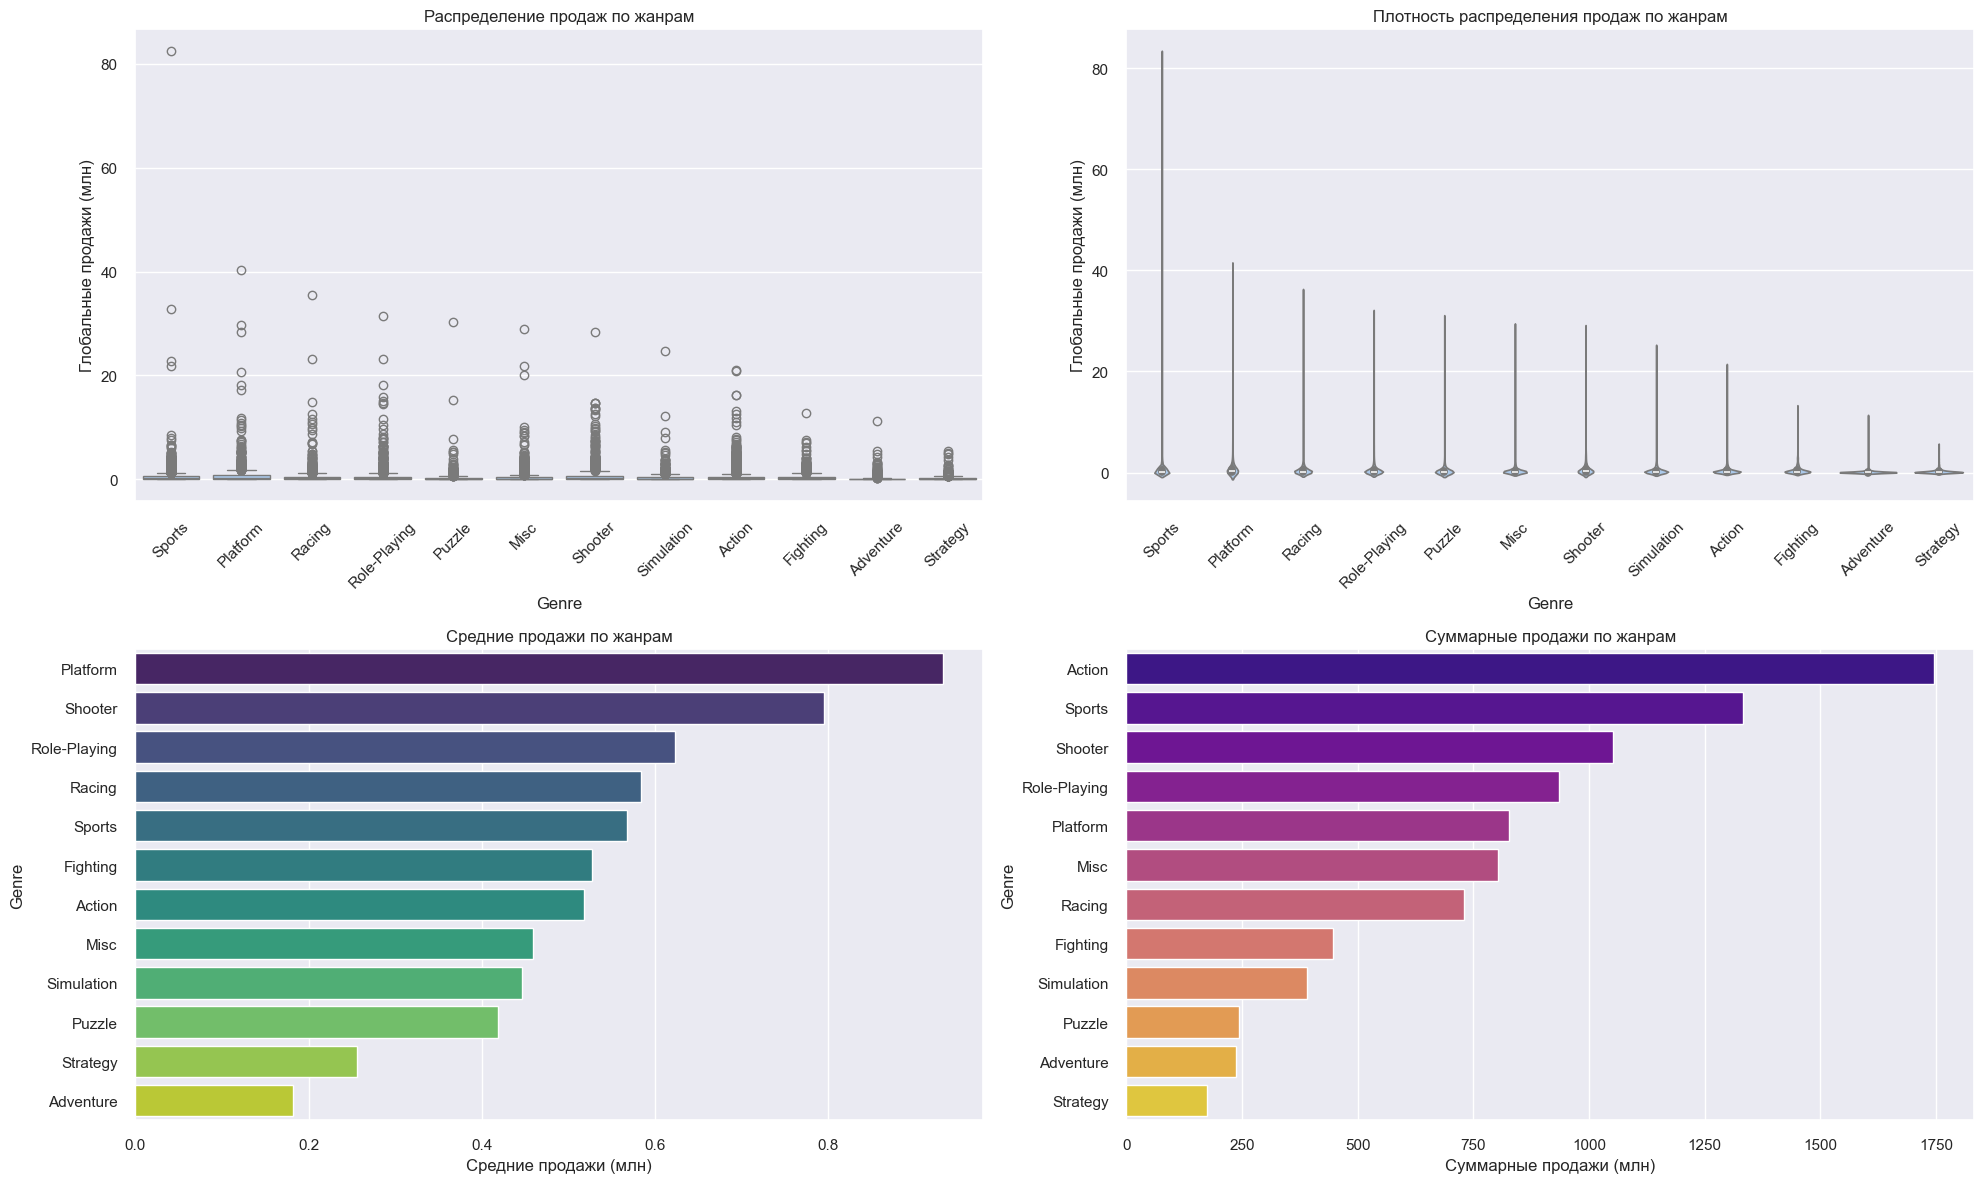

In [34]:
print("="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 3:")
print("Различаются ли продажи игр по жанрам? Какие жанры наиболее успешны?")
print("="*60)

# Статистический анализ
genre_stats = df.groupby('Genre')['Global_Sales'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max', 'sum'
]).round(3)

print("Статистика продаж по жанрам:")
display(genre_stats.sort_values('sum', ascending=False))

# ANOVA тест
genre_groups = [group['Global_Sales'].values for name, group in df.groupby('Genre')]
f_stat, p_value_anova = stats.f_oneway(*genre_groups)
print(f"\nANOVA F-статистика: {f_stat:.3f}")
print(f"P-значение: {p_value_anova:.6f}")
print(f"Статистически значимые различия между жанрами: {'Да' if p_value_anova < 0.05 else 'Нет'}")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Box plot
sns.boxplot(data=df, x='Genre', y='Global_Sales', ax=axes[0, 0])
axes[0, 0].set_title('Распределение продаж по жанрам')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Глобальные продажи (млн)')

# Violin plot
sns.violinplot(data=df, x='Genre', y='Global_Sales', ax=axes[0, 1])
axes[0, 1].set_title('Плотность распределения продаж по жанрам')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylabel('Глобальные продажи (млн)')

# Bar plot средних продаж
genre_means = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=genre_means.values, y=genre_means.index, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Средние продажи по жанрам')
axes[1, 0].set_xlabel('Средние продажи (млн)')

# Bar plot суммарных продаж
genre_totals = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=genre_totals.values, y=genre_totals.index, ax=axes[1, 1], palette='plasma')
axes[1, 1].set_title('Суммарные продажи по жанрам')
axes[1, 1].set_xlabel('Суммарные продажи (млн)')

plt.tight_layout()
plt.show()


ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 4:
Как различаются продажи игр по платформам?
Статистика продаж по топ-10 платформам:


,count,mean,sum
Platform,,,
PS2,2161,0.581,1255.64
X360,1262,0.770,971.63
PS3,1331,0.706,939.43
Wii,1320,0.688,908.13
DS,2152,0.375,807.10
PS,1197,0.610,730.68
GBA,822,0.387,318.50
PSP,1209,0.243,294.30
PC,974,0.267,260.30


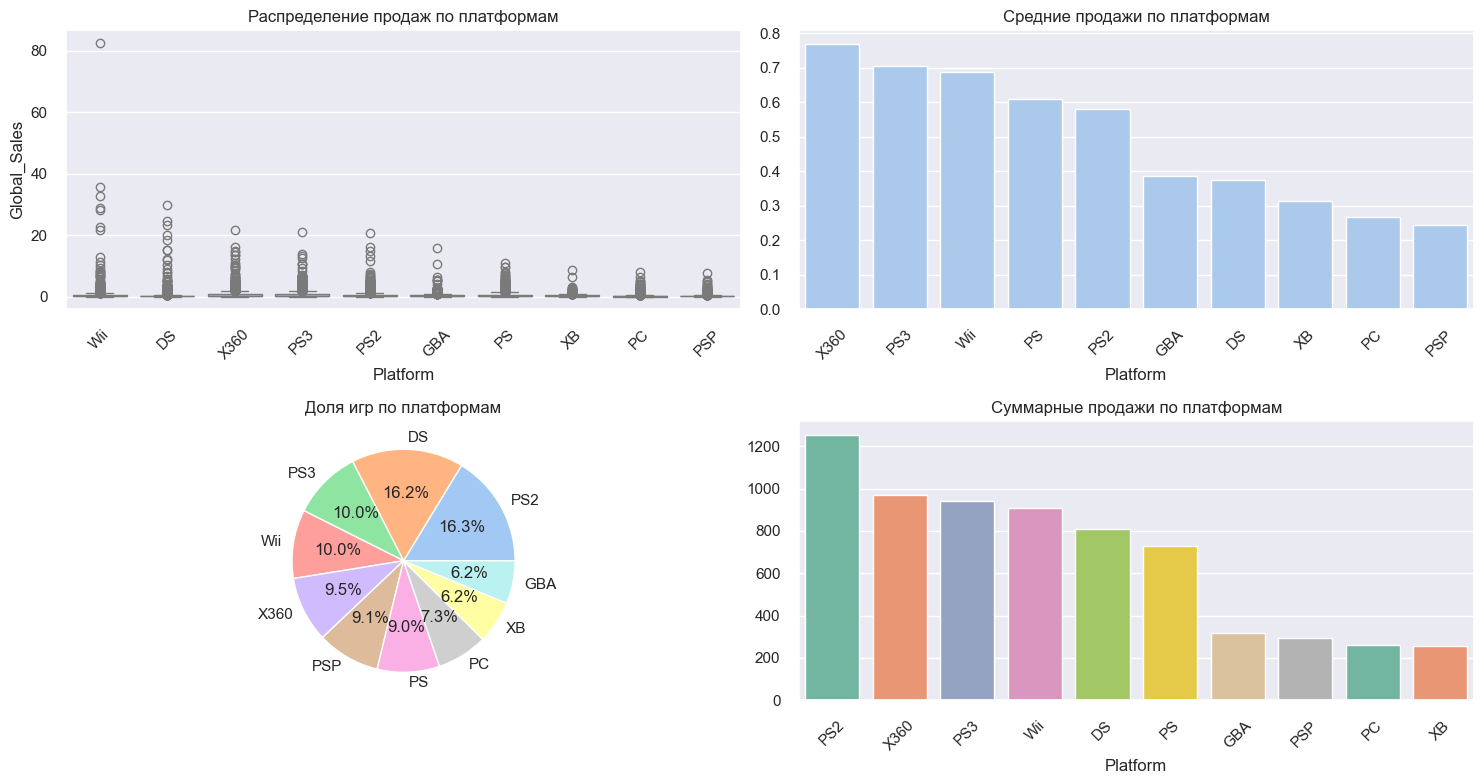

In [36]:
print("\n" + "="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 4:")
print("Как различаются продажи игр по платформам?")
print("="*60)

# Анализ по топ-10 платформам
top_platforms = df['Platform'].value_counts().head(10).index
df_top_platforms = df[df['Platform'].isin(top_platforms)]

platform_stats = df_top_platforms.groupby('Platform')['Global_Sales'].agg([
    'count', 'mean', 'sum'
]).round(3)

print("Статистика продаж по топ-10 платформам:")
display(platform_stats.sort_values('sum', ascending=False))

# Визуализация
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df_top_platforms, x='Platform', y='Global_Sales')
plt.title('Распределение продаж по платформам')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
platform_means = df_top_platforms.groupby('Platform')['Global_Sales'].mean().sort_values(ascending=False)
sns.barplot(x=platform_means.index, y=platform_means.values)
plt.title('Средние продажи по платформам')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
platform_counts = df_top_platforms['Platform'].value_counts()
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Доля игр по платформам')

plt.subplot(2, 2, 4)
platform_totals = df_top_platforms.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_totals.index, y=platform_totals.values, palette='Set2')
plt.title('Суммарные продажи по платформам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5.3 Категориальная & категориальная

ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 5:
Существует ли связь между жанром игры и возрастным рейтингом?
Таблица сопряженности Genre vs Rating:


Rating,AO,E,E10+,EC,K-A,M,RP,T,All
Genre,,,,,,,,,
Action,1,416,481,1,0,608,0,681,2188
Adventure,0,162,68,2,0,99,0,115,446
Fighting,0,8,19,0,0,49,0,362,438
Misc,0,457,167,5,1,13,0,239,882
Platform,0,358,144,0,0,3,0,64,569
Puzzle,0,289,43,0,0,0,0,10,342
Racing,0,585,96,0,0,18,1,172,872
Role-Playing,0,84,111,0,0,162,0,420,777
Shooter,0,48,58,0,0,565,0,348,1019



Хи-квадрат статистика: 5255.668
Степени свободы: 77
P-значение: 0.000000
Статистически значимая связь: Да
Коэффициент Крамера V: 0.275


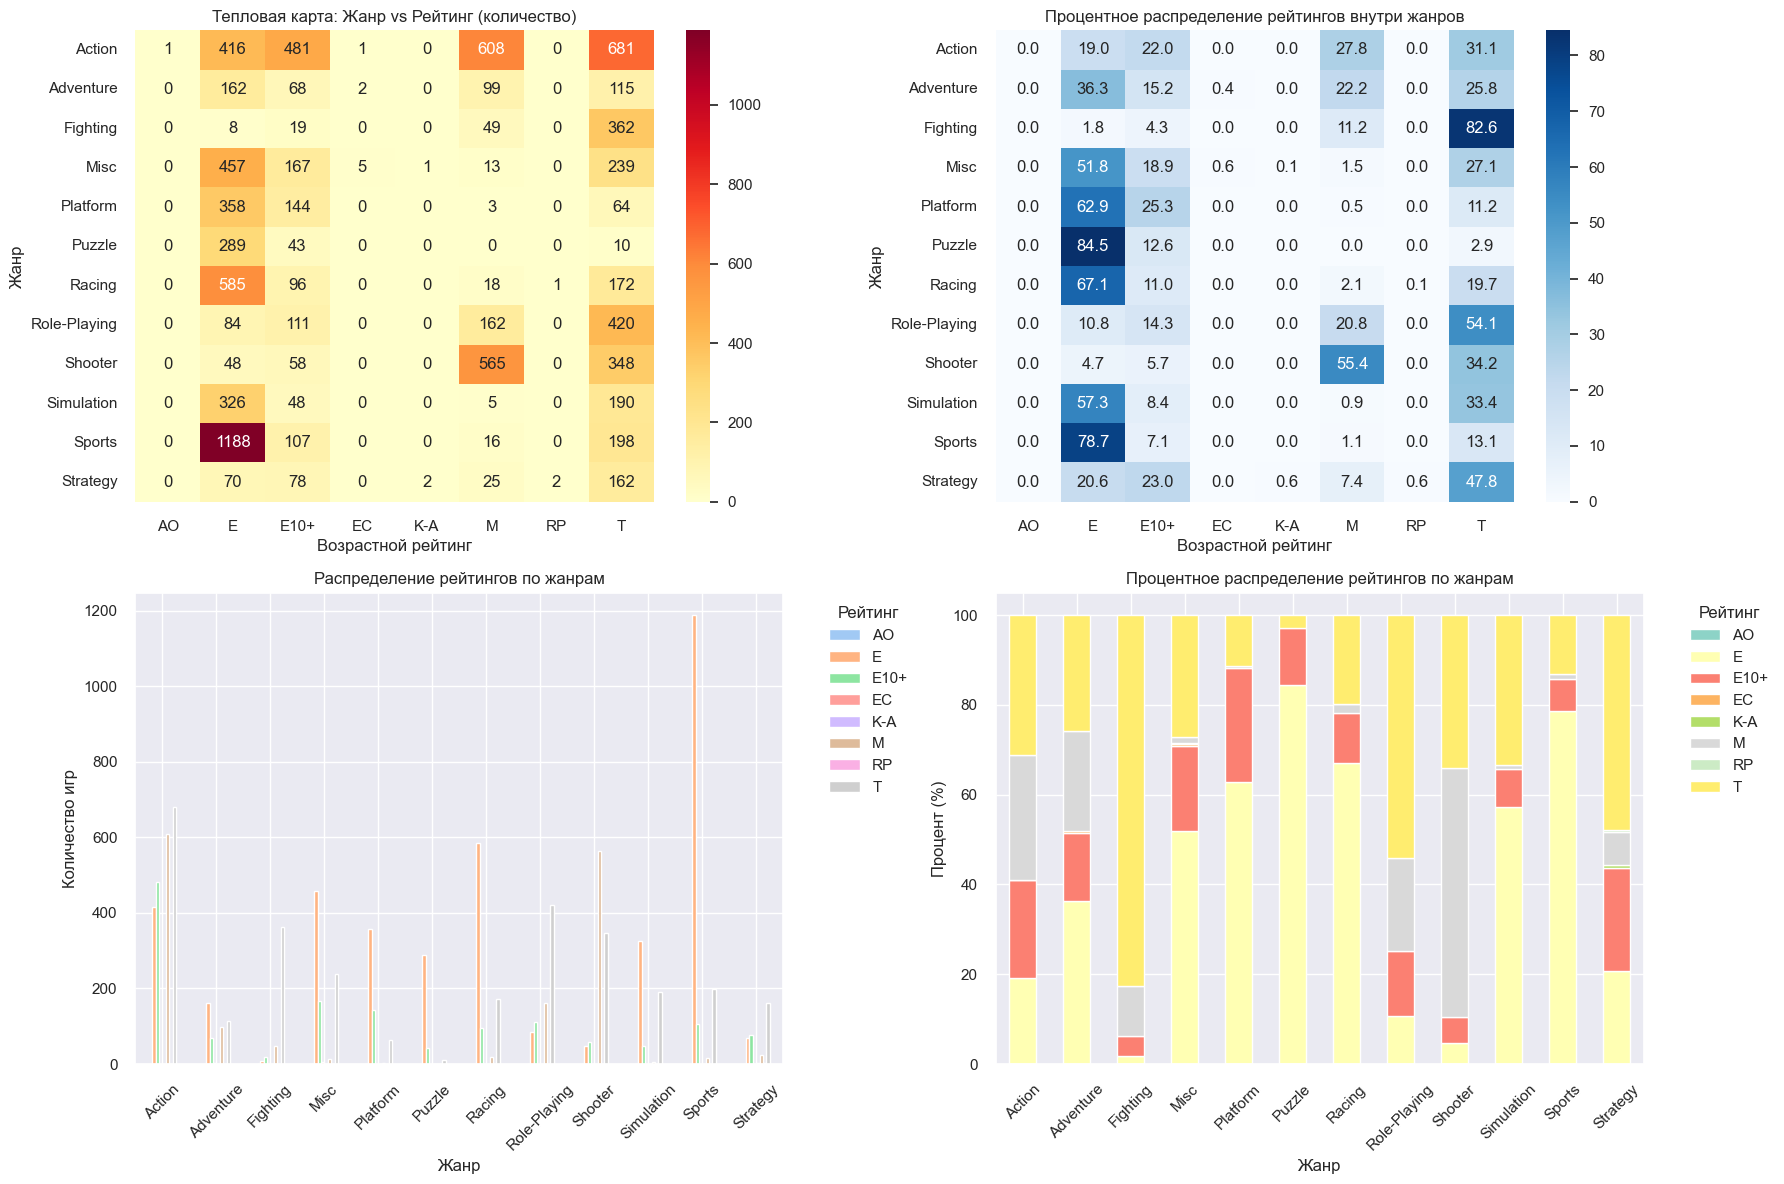


Топ-10 сочетаний жанр-рейтинг:


Genre         Rating
Sports        E         1188
Action        T          681
              M          608
Racing        E          585
Shooter       M          565
Action        E10+       481
Misc          E          457
Role-Playing  T          420
Action        E          416
Fighting      T          362
dtype: int64

In [38]:
print("="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 5:")
print("Существует ли связь между жанром игры и возрастным рейтингом?")
print("="*60)

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['Genre'], df['Rating'], margins=True)
print("Таблица сопряженности Genre vs Rating:")
display(contingency_table)

# Хи-квадрат тест
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table.iloc[:-1, :-1])
print(f"\nХи-квадрат статистика: {chi2:.3f}")
print(f"Степени свободы: {dof}")
print(f"P-значение: {p_value_chi2:.6f}")
print(f"Статистически значимая связь: {'Да' if p_value_chi2 < 0.05 else 'Нет'}")

# Коэффициент Крамера V (мера связи для категориальных переменных)
n = contingency_table.iloc[:-1, :-1].sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 2)))
print(f"Коэффициент Крамера V: {cramers_v:.3f}")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Тепловая карта
sns.heatmap(contingency_table.iloc[:-1, :-1], annot=True, fmt='d', cmap='YlOrRd', ax=axes[0, 0])
axes[0, 0].set_title('Тепловая карта: Жанр vs Рейтинг (количество)')
axes[0, 0].set_xlabel('Возрастной рейтинг')
axes[0, 0].set_ylabel('Жанр')

# Нормализованная тепловая карта (проценты по строкам)
contingency_norm = pd.crosstab(df['Genre'], df['Rating'], normalize='index') * 100
sns.heatmap(contingency_norm, annot=True, fmt='.1f', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Процентное распределение рейтингов внутри жанров')
axes[0, 1].set_xlabel('Возрастной рейтинг')
axes[0, 1].set_ylabel('Жанр')

# Grouped bar chart
contingency_table.iloc[:-1, :-1].plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Распределение рейтингов по жанрам')
axes[1, 0].set_xlabel('Жанр')
axes[1, 0].set_ylabel('Количество игр')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].legend(title='Рейтинг', bbox_to_anchor=(1.05, 1), loc='upper left')

# Stacked bar chart (проценты)
contingency_norm.plot(kind='bar', stacked=True, ax=axes[1, 1], colormap='Set3')
axes[1, 1].set_title('Процентное распределение рейтингов по жанрам')
axes[1, 1].set_xlabel('Жанр')
axes[1, 1].set_ylabel('Процент (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Рейтинг', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Анализ наиболее характерных сочетаний
print("\nТоп-10 сочетаний жанр-рейтинг:")
genre_rating_combinations = df.groupby(['Genre', 'Rating']).size().sort_values(ascending=False).head(10)
display(genre_rating_combinations)


ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 6:
Как распределяются издатели по различным жанрам?
Распределение топ-издателей по жанрам:


Genre,Action,Adventure,Misc,Platform,Racing,Role-Playing,Shooter,Sports
Publisher,,,,,,,,
Activision,311,26,103,65,74,41,162,144
Electronic Arts,183,13,46,16,159,35,145,560
Konami Digital Entertainment,150,53,77,40,13,37,40,281
Namco Bandai Games,251,58,97,19,27,153,37,51
Nintendo,80,35,101,112,37,108,25,55
Sega,101,31,62,52,47,64,40,134
Sony Computer Entertainment,91,42,129,66,66,48,52,124
THQ,194,47,66,85,101,8,36,31
Take-Two Interactive,96,12,27,11,20,6,65,156


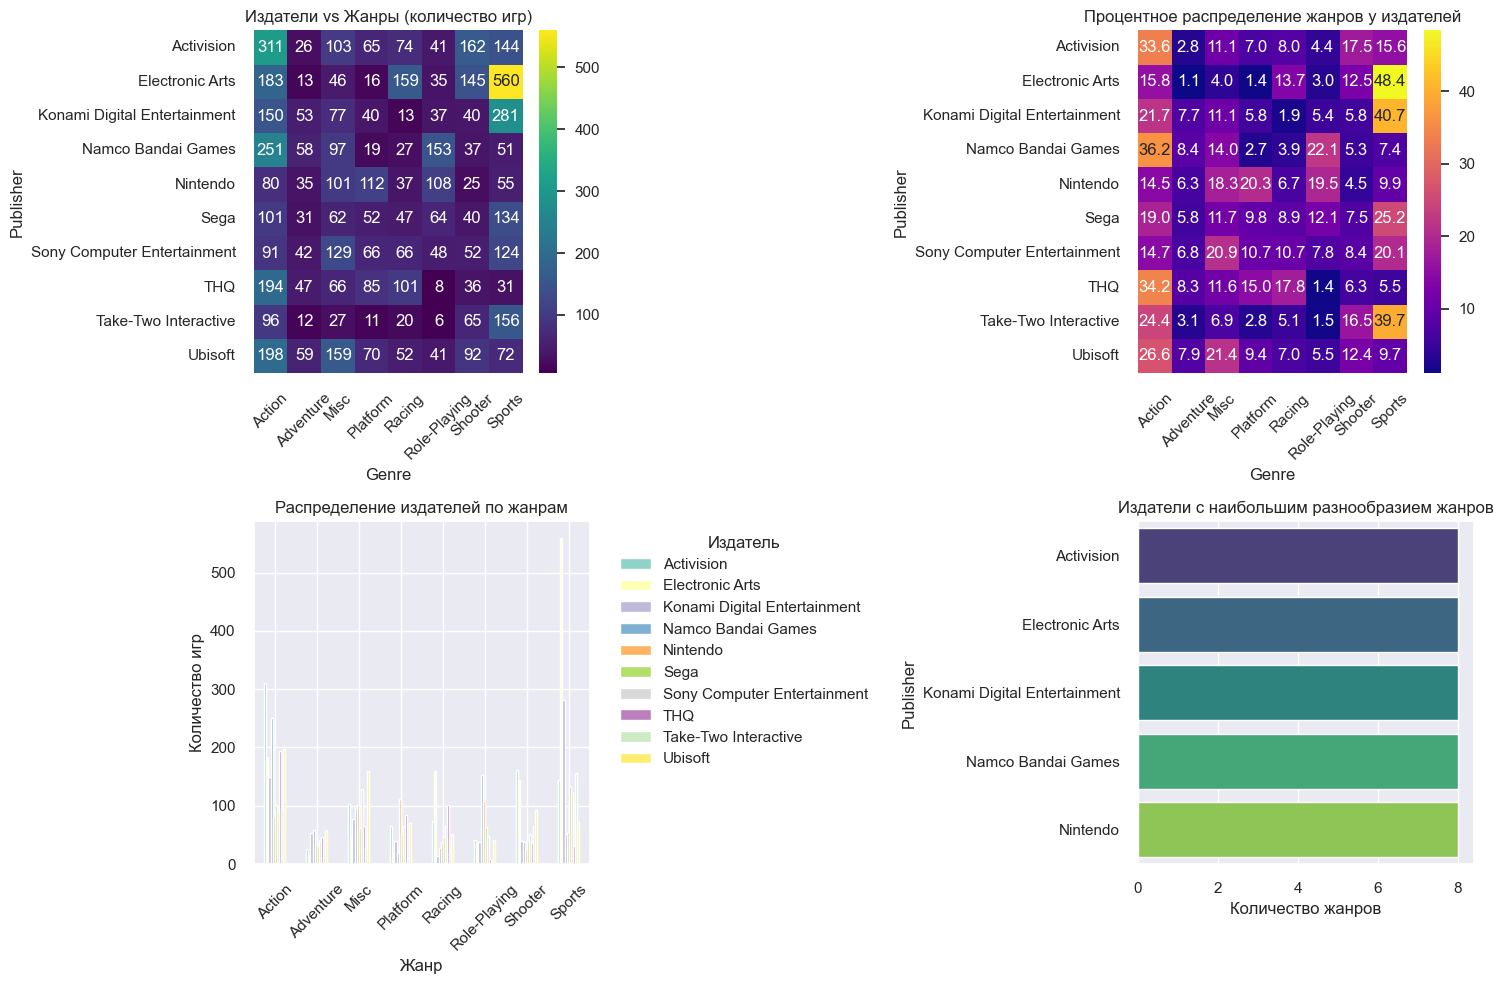

In [46]:
print("\n" + "="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 6:")
print("Как распределяются издатели по различным жанрам?")
print("="*60)

# Анализ топ-10 издателей и топ-8 жанров
top_publishers = df['Publisher'].value_counts().head(10).index
top_genres = df['Genre'].value_counts().head(8).index

df_filtered = df[df['Publisher'].isin(top_publishers) & df['Genre'].isin(top_genres)]

# Таблица сопряженности
pub_genre_table = pd.crosstab(df_filtered['Publisher'], df_filtered['Genre'])
print("Распределение топ-издателей по жанрам:")
display(pub_genre_table)

# Визуализация
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(pub_genre_table, annot=True, fmt='d', cmap='viridis')
plt.title('Издатели vs Жанры (количество игр)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.subplot(2, 2, 2)
# Нормализация по строкам (проценты для каждого издателя)
pub_genre_norm = pd.crosstab(df_filtered['Publisher'], df_filtered['Genre'], normalize='index') * 100
sns.heatmap(pub_genre_norm, annot=True, fmt='.1f', cmap='plasma')
plt.title('Процентное распределение жанров у издателей')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Используем subplot без stacked (проблемный метод)
plt.subplot(2, 2, 3)
pub_genre_table.T.plot(kind='bar', ax=plt.gca(), colormap='Set3')
plt.title('Распределение издателей по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.legend(title='Издатель', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Топ-5 издателей с наибольшим разнообразием жанров
diversity = pub_genre_table.astype(bool).sum(axis=1).sort_values(ascending=False).head(5)
sns.barplot(x=diversity.values, y=diversity.index, palette='viridis')
plt.title('Издатели с наибольшим разнообразием жанров')
plt.xlabel('Количество жанров')

plt.tight_layout()
plt.show()

### 5.4 Временной ряд

ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 7:
Как изменялись продажи видеоигр и предпочтения по жанрам со временем?
Топ-10 лет по суммарным продажам:


,Суммарные_продажи,Средние_продажи,Количество_игр
Year_of_Release,,,
2008.0,770.75,0.454,1696
2009.0,658.88,0.462,1426
2007.0,605.37,0.506,1197
2010.0,590.59,0.471,1255
2006.0,518.22,0.515,1006
2011.0,507.79,0.447,1136
2005.0,458.31,0.488,939
2004.0,419.05,0.550,762
2002.0,395.51,0.477,829


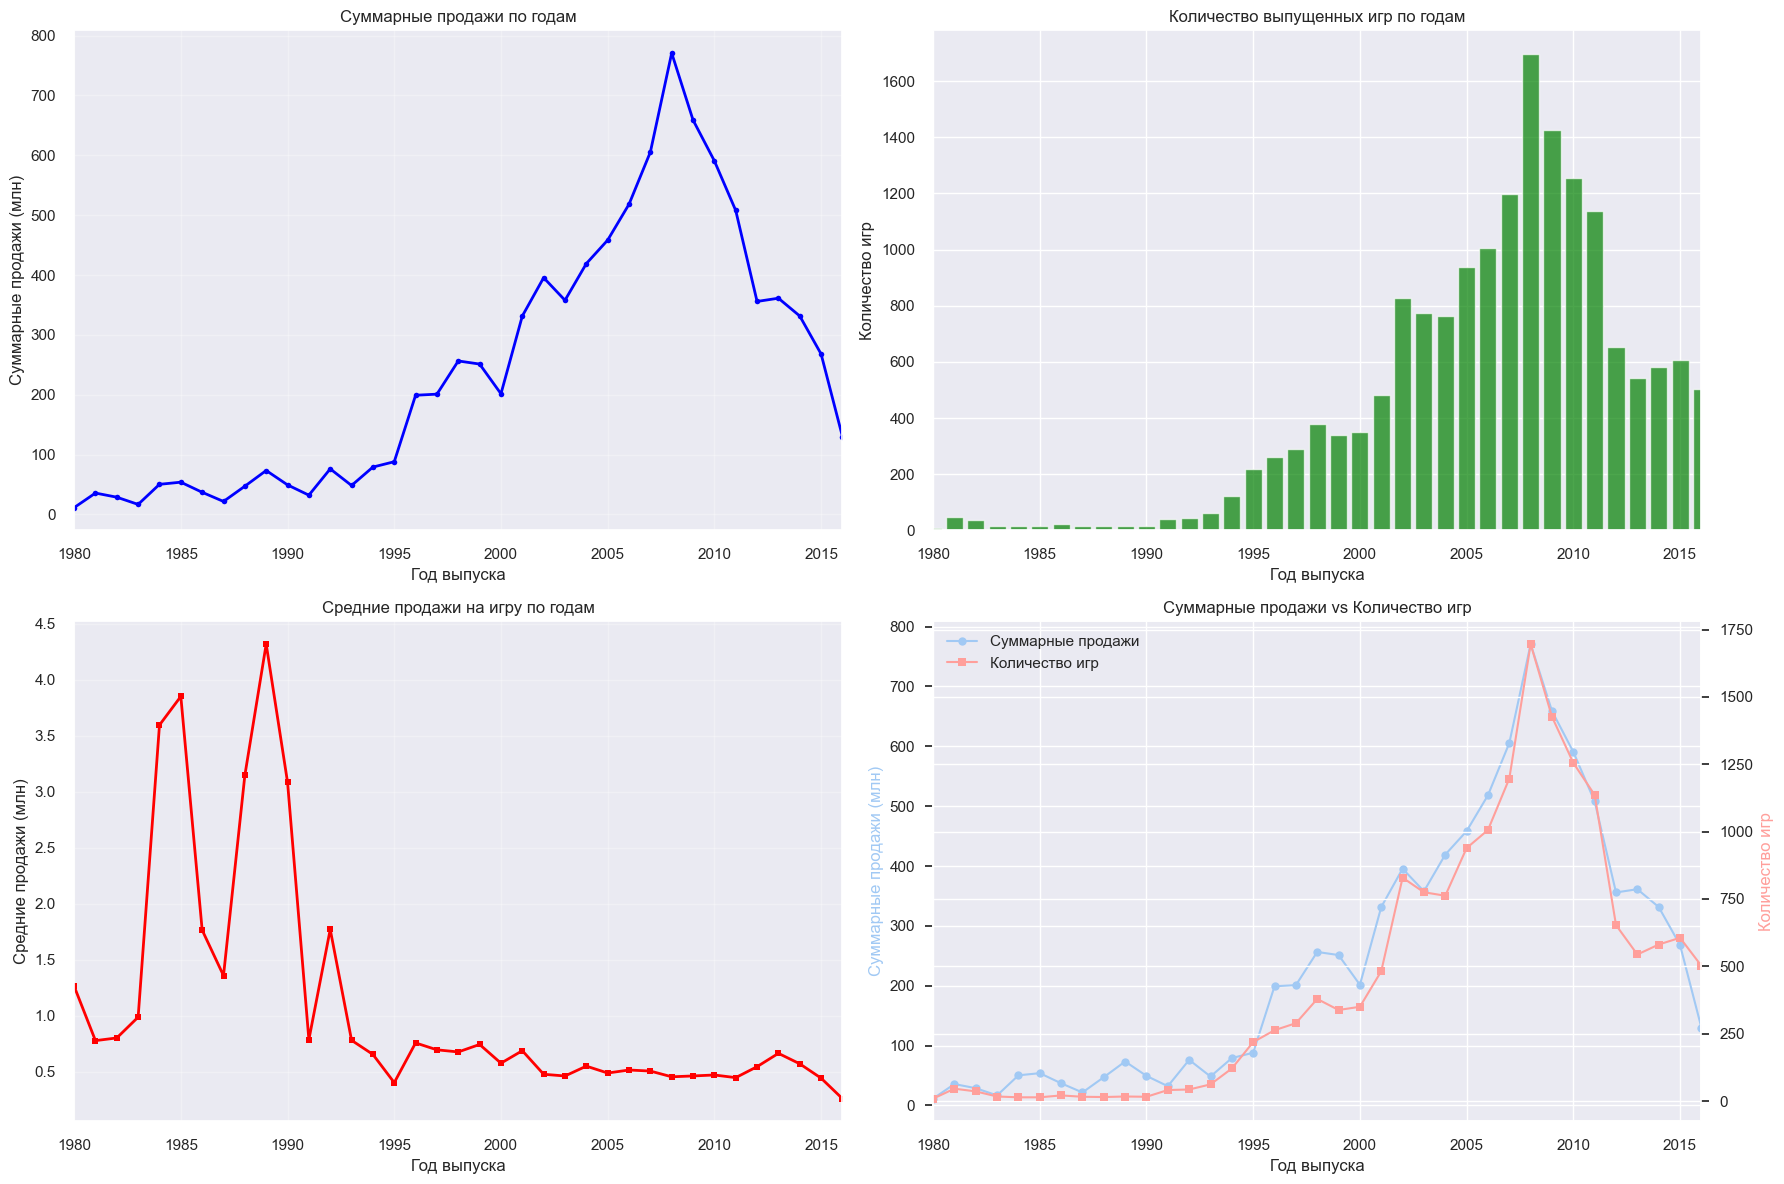


Анализ изменения популярности жанров во времени:


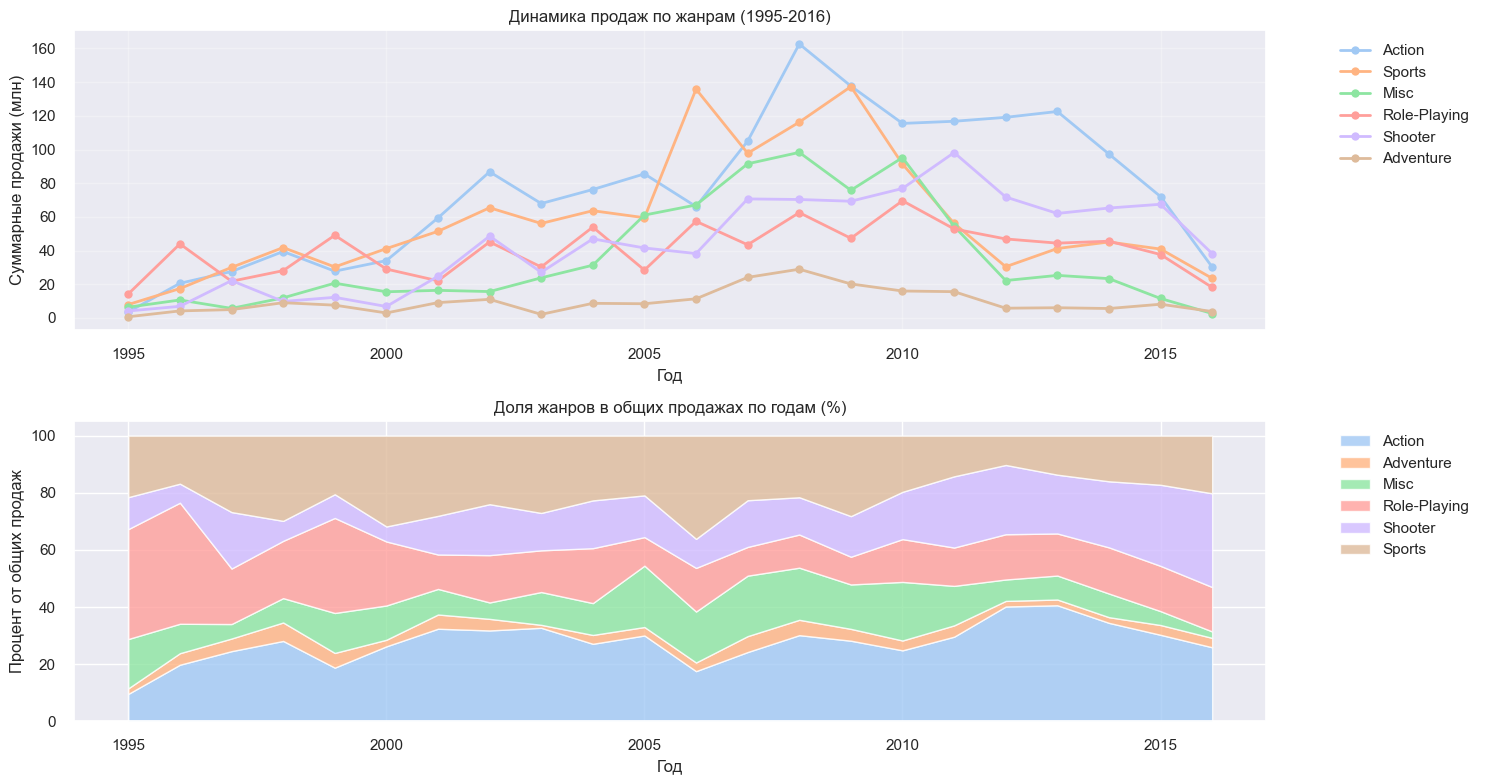


Статистический анализ трендов:


,Наклон тренда,R-квадрат,P-значение,Значимость
Action,4.217,0.407,0.0014,Да
Sports,1.427,0.066,0.25,Нет
Misc,1.454,0.09,0.1749,Нет
Role-Playing,0.816,0.128,0.1023,Нет
Shooter,3.422,0.652,0.0,Да
Adventure,0.3,0.073,0.2239,Нет


In [48]:
print("="*60)
print("ИССЛЕДОВАТЕЛЬСКИЙ ВОПРОС 7:")
print("Как изменялись продажи видеоигр и предпочтения по жанрам со временем?")
print("="*60)

# Анализ продаж по годам
sales_by_year = df.groupby('Year_of_Release').agg({
    'Global_Sales': ['sum', 'mean', 'count']
}).round(3)
sales_by_year.columns = ['Суммарные_продажи', 'Средние_продажи', 'Количество_игр']

print("Топ-10 лет по суммарным продажам:")
display(sales_by_year.sort_values('Суммарные_продажи', ascending=False).head(10))

# Фильтруем данные с 1980 по 2016 год для лучшей визуализации
df_filtered_years = df[(df['Year_of_Release'] >= 1980) & (df['Year_of_Release'] <= 2016)]
sales_by_year_filtered = df_filtered_years.groupby('Year_of_Release').agg({
    'Global_Sales': ['sum', 'mean', 'count']
})
sales_by_year_filtered.columns = ['Суммарные_продажи', 'Средние_продажи', 'Количество_игр']

# Визуализация временных трендов
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Суммарные продажи по годам
axes[0, 0].plot(sales_by_year_filtered.index, sales_by_year_filtered['Суммарные_продажи'], 
                marker='o', linewidth=2, markersize=4, color='blue')
axes[0, 0].set_title('Суммарные продажи по годам')
axes[0, 0].set_xlabel('Год выпуска')
axes[0, 0].set_ylabel('Суммарные продажи (млн)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xlim(1980, 2016)

# Количество выпущенных игр по годам
axes[0, 1].bar(sales_by_year_filtered.index, sales_by_year_filtered['Количество_игр'], 
               color='green', alpha=0.7)
axes[0, 1].set_title('Количество выпущенных игр по годам')
axes[0, 1].set_xlabel('Год выпуска')
axes[0, 1].set_ylabel('Количество игр')
axes[0, 1].set_xlim(1980, 2016)

# Средние продажи по годам
axes[1, 0].plot(sales_by_year_filtered.index, sales_by_year_filtered['Средние_продажи'], 
                marker='s', linewidth=2, markersize=4, color='red')
axes[1, 0].set_title('Средние продажи на игру по годам')
axes[1, 0].set_xlabel('Год выпуска')
axes[1, 0].set_ylabel('Средние продажи (млн)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(1980, 2016)

# Комбинированный график
ax_twin = axes[1, 1].twinx()
line1 = axes[1, 1].plot(sales_by_year_filtered.index, sales_by_year_filtered['Суммарные_продажи'], 
                       'b-', marker='o', label='Суммарные продажи')
line2 = ax_twin.plot(sales_by_year_filtered.index, sales_by_year_filtered['Количество_игр'], 
                     'r-', marker='s', label='Количество игр')

axes[1, 1].set_xlabel('Год выпуска')
axes[1, 1].set_ylabel('Суммарные продажи (млн)', color='b')
ax_twin.set_ylabel('Количество игр', color='r')
axes[1, 1].set_title('Суммарные продажи vs Количество игр')
axes[1, 1].set_xlim(1980, 2016)

# Легенда
lines1, labels1 = axes[1, 1].get_legend_handles_labels()
lines2, labels2 = ax_twin.get_legend_handles_labels()
axes[1, 1].legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# Анализ трендов по жанрам во времени
print("\nАнализ изменения популярности жанров во времени:")

# Топ-6 жанров для анализа
top_6_genres = df['Genre'].value_counts().head(6).index
df_top_genres = df[df['Genre'].isin(top_6_genres)]

# Продажи по жанрам и годам
genre_year_sales = df_top_genres.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().reset_index()
genre_year_pivot = genre_year_sales.pivot(index='Year_of_Release', columns='Genre', values='Global_Sales')
genre_year_pivot = genre_year_pivot.fillna(0)

# Фильтруем по годам для лучшей визуализации
genre_year_pivot_filtered = genre_year_pivot[(genre_year_pivot.index >= 1995) & (genre_year_pivot.index <= 2016)]

# Визуализация трендов жанров
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
for genre in top_6_genres:
    plt.plot(genre_year_pivot_filtered.index, genre_year_pivot_filtered[genre], 
             marker='o', linewidth=2, label=genre)

plt.title('Динамика продаж по жанрам (1995-2016)')
plt.xlabel('Год')
plt.ylabel('Суммарные продажи (млн)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
# Нормализуем данные для показа доли каждого жанра
genre_year_norm = genre_year_pivot_filtered.div(genre_year_pivot_filtered.sum(axis=1), axis=0) * 100

# Stacked area chart
plt.stackplot(genre_year_norm.index, *[genre_year_norm[col] for col in genre_year_norm.columns], 
              labels=genre_year_norm.columns, alpha=0.8)
plt.title('Доля жанров в общих продажах по годам (%)')
plt.xlabel('Год')
plt.ylabel('Процент от общих продаж')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Статистический анализ тренда
print("\nСтатистический анализ трендов:")
from scipy.stats import linregress

trend_analysis = {}
for genre in top_6_genres:
    years = genre_year_pivot_filtered.index.values
    sales = genre_year_pivot_filtered[genre].values
    slope, intercept, r_value, p_value, std_err = linregress(years, sales)
    trend_analysis[genre] = {
        'Наклон тренда': round(slope, 3),
        'R-квадрат': round(r_value**2, 3),
        'P-значение': round(p_value, 4),
        'Значимость': 'Да' if p_value < 0.05 else 'Нет'
    }

trend_df = pd.DataFrame(trend_analysis).T
display(trend_df)

## 6. Группировки и агрегирование

РАСШИРЕННЫЙ АНАЛИЗ С ИСПОЛЬЗОВАНИЕМ GROUPBY, AGG И APPLY
1. Анализ продаж по платформам и жанрам (топ-5 платформ и жанров):
Топ-15 комбинаций платформа-жанр по суммарным продажам:


Количество   Сумма  Среднее  Медиана  Ст.откл  Минимум  \
Platform Genre                                                                  
PS3      Action               380  301.55    0.794    0.315    1.638     0.01   
Wii      Sports               260  288.61    1.110    0.225    5.835     0.01   
X360     Shooter              203  276.98    1.364    0.390    2.680     0.01   
PS2      Sports               400  273.41    0.684    0.315    0.951     0.01   
         Action               348  272.76    0.784    0.350    1.763     0.01   
X360     Action               323  239.69    0.742    0.290    1.402     0.01   
Wii      Misc                 280  216.37    0.773    0.220    2.178     0.01   
PS3      Shooter              156  192.46    1.234    0.540    2.281     0.01   
X360     Sports               217  138.45    0.638    0.310    0.886     0.01   
DS       Misc                 391  135.72    0.347    0.090    1.257     0.01   
PS3      Sports               214  133.88    0.626    0.270    0.971     0.01   
DS       Role-Playing         200  124.44    0.622    0.130    1.932     0.01   
Wii      Action               237  114.51    0.483    0.230    0.787     0.01   
DS       Action               340  112.70    0.331    0.120    0.840     0.01   
PS2      Shooter              160  108.57    0.679    0.275    1.020     0.01   

                       Максимум    IQR  
Platform Genre                          
PS3      Action           21.04  0.702  
Wii      Sports           82.53  0.462  
X360     Shooter          14.73  1.020  
PS2      Sports            5.23  0.632  
         Action           20.81  0.538  
X360     Action           16.27  0.675  
Wii      Misc             28.92  0.483  
PS3      Shooter          13.79  0.972  
X360     Sports            6.19  0.590  
DS       Misc             20.15  0.205  
PS3      Sports            6.65  0.568  
DS       Role-Playing     18.25  0.305  
Wii      Action            7.15  0.440  
DS       Action           11.77  0.260  
PS2      Shooter           6.83  0.645


2. Пользовательские метрики с использованием apply:
Метрики успешности по жанрам:


,Хит_игры,Провалы,Коэф_вариации,Асимметрия,Размах
Genre,,,,,
Action,336.0,322.0,2.211,7.950,21.03
Adventure,128.0,0.0,2.786,11.146,11.17
Fighting,85.0,80.0,1.807,5.366,12.83
Misc,175.0,166.0,2.843,12.052,28.91
Platform,89.0,78.0,2.760,8.738,40.23
Puzzle,58.0,35.0,3.729,14.039,30.25
Racing,124.0,111.0,2.839,11.773,35.51
Role-Playing,150.0,123.0,2.744,8.929,31.36
Shooter,133.0,112.0,2.282,6.350,28.30



3. Многоуровневая группировка: Десятилетие -> Жанр -> Метрики:
Анализ по десятилетиям и жанрам (топ-20):


Игр_всего  Продажи_сумма  Продажи_среднее  \
Decade Genre                                                     
2000   Action             1646         881.31            0.535   
       Sports             1446         824.51            0.570   
2010   Action             1496         673.50            0.450   
2000   Misc               1050         496.51            0.473   
2010   Shooter             410         479.87            1.170   
2000   Shooter             746         444.33            0.596   
       Racing              821         443.66            0.540   
       Role-Playing        749         419.49            0.560   
       Platform            577         377.20            0.654   
2010   Sports              575         328.64            0.572   
       Role-Playing        570         315.15            0.553   
2000   Simulation          567         265.79            0.469   
       Fighting            453         235.26            0.519   
2010   Misc                576         234.68            0.407   
1990   Platform            125         208.91            1.671   
       Role-Playing        172         184.51            1.073   
       Racing              183         150.40            0.822   
       Sports              304         146.57            0.482   
       Action              162         139.28            0.860   
2000   Adventure           641         127.03            0.198   

                     Критики_оценка  Критики_количество  Юзеры_оценка  \
Decade Genre                                                            
2000   Action                65.079                1165         7.237   
       Sports                72.301                 926         7.381   
2010   Action                68.889                 712         6.782   
2000   Misc                  65.672                 381         6.894   
2010   Shooter               71.881                 303         6.486   
2000   Shooter               69.263                 634         7.332   
       Racing                67.017                 589         7.205   
       Role-Playing          71.989                 462         7.773   
       Platform              66.216                 394         7.349   
2010   Sports                70.697                 264         5.902   
       Role-Playing          73.063                 254         7.283   
2000   Simulation            69.492                 264         7.462   
       Fighting              68.502                 277         7.445   
2010   Misc                  69.021                 140         6.647   
1990   Platform              86.000                   6         8.783   
       Role-Playing          82.286                  21         8.529   
       Racing                82.818                  11         8.622   
       Sports                78.750                   4         8.950   
       Action                81.769                  13         8.540   
2000   Adventure             63.032                 218         6.991   

                     Юзеры_количество  
Decade Genre                           
2000   Action                    1036  
       Sports                     786  
2010   Action                     779  
2000   Misc                       294  
2010   Shooter                    323  
2000   Shooter                    596  
       Racing                     486  
       Role-Playing               457  
       Platform                   317  
2010   Sports                     315  
       Role-Playing               265  
2000   Simulation                 252  
       Fighting                   259  
2010   Misc                       143  
1990   Platform                     6  
       Role-Playing                21  
       Racing                       9  
       Sports                       2  
       Action                      15  
2000   Adventure                  190


4. Сложные вычисления с apply - рейтинг издателей:
Рейтинг издателей (комплексная оценка):


,Всего_игр,Суммарные_продажи,Средние_продажи,Хит_игры,Средняя_оценка_критиков,Средняя_оценка_пользователей,Комплексный_рейтинг
Publisher,,,,,,,
Nintendo,706.0,1788.81,2.53,141.0,75.5,7.9,745.65
Electronic Arts,1356.0,1116.96,0.82,271.0,74.5,7.0,502.31
Activision,985.0,731.16,0.74,195.0,69.7,6.7,332.71
Sony Computer Entertainment,687.0,606.48,0.88,137.0,74.0,7.6,271.39
Ubisoft,933.0,471.61,0.51,184.0,68.5,7.0,226.64
Take-Two Interactive,422.0,403.82,0.96,83.0,75.0,7.1,179.50
THQ,715.0,338.44,0.47,142.0,66.7,7.1,164.96
Konami Digital Entertainment,834.0,282.39,0.34,167.0,68.3,7.3,147.53
Namco Bandai Games,939.0,254.62,0.27,188.0,66.4,7.2,140.59



5. Региональный анализ продаж:
Региональный анализ продаж по жанрам:


,NA_Sales_sum,NA_Sales_mean,NA_Sales_max,EU_Sales_sum,EU_Sales_mean,EU_Sales_max,JP_Sales_sum,JP_Sales_mean,JP_Sales_max,Other_Sales_sum,Other_Sales_mean,Other_Sales_max,Global_Sales_sum,Global_Sales_mean,Global_Sales_max
Genre,,,,,,,,,,,,,,,
Action,879.01,0.261,9.66,519.13,0.154,9.09,161.44,0.048,3.96,184.60,0.055,10.57,1745.27,0.518,21.04
Sports,684.43,0.291,41.36,376.79,0.160,28.96,135.54,0.058,3.77,134.51,0.057,8.45,1332.00,0.567,82.53
Shooter,592.24,0.448,26.93,317.34,0.240,5.86,38.76,0.029,1.46,104.11,0.079,2.42,1052.94,0.796,28.31
Role-Playing,330.81,0.221,11.27,188.71,0.126,8.89,355.46,0.237,10.22,59.63,0.040,1.74,934.40,0.623,31.37
Platform,445.50,0.502,29.08,200.35,0.226,9.14,130.83,0.147,6.81,51.09,0.058,2.88,828.08,0.933,40.24
Misc,407.27,0.233,15.00,212.74,0.122,9.20,108.11,0.062,4.16,74.39,0.043,2.84,803.18,0.459,28.92
Racing,359.35,0.288,15.68,236.51,0.189,12.76,56.71,0.045,4.13,76.10,0.061,7.53,728.90,0.584,35.52
Fighting,223.36,0.263,6.62,100.33,0.118,2.55,87.48,0.103,2.87,36.36,0.043,1.41,447.48,0.527,12.84
Simulation,182.19,0.208,9.05,113.52,0.130,10.95,63.80,0.073,5.33,30.75,0.035,2.74,390.42,0.447,24.67


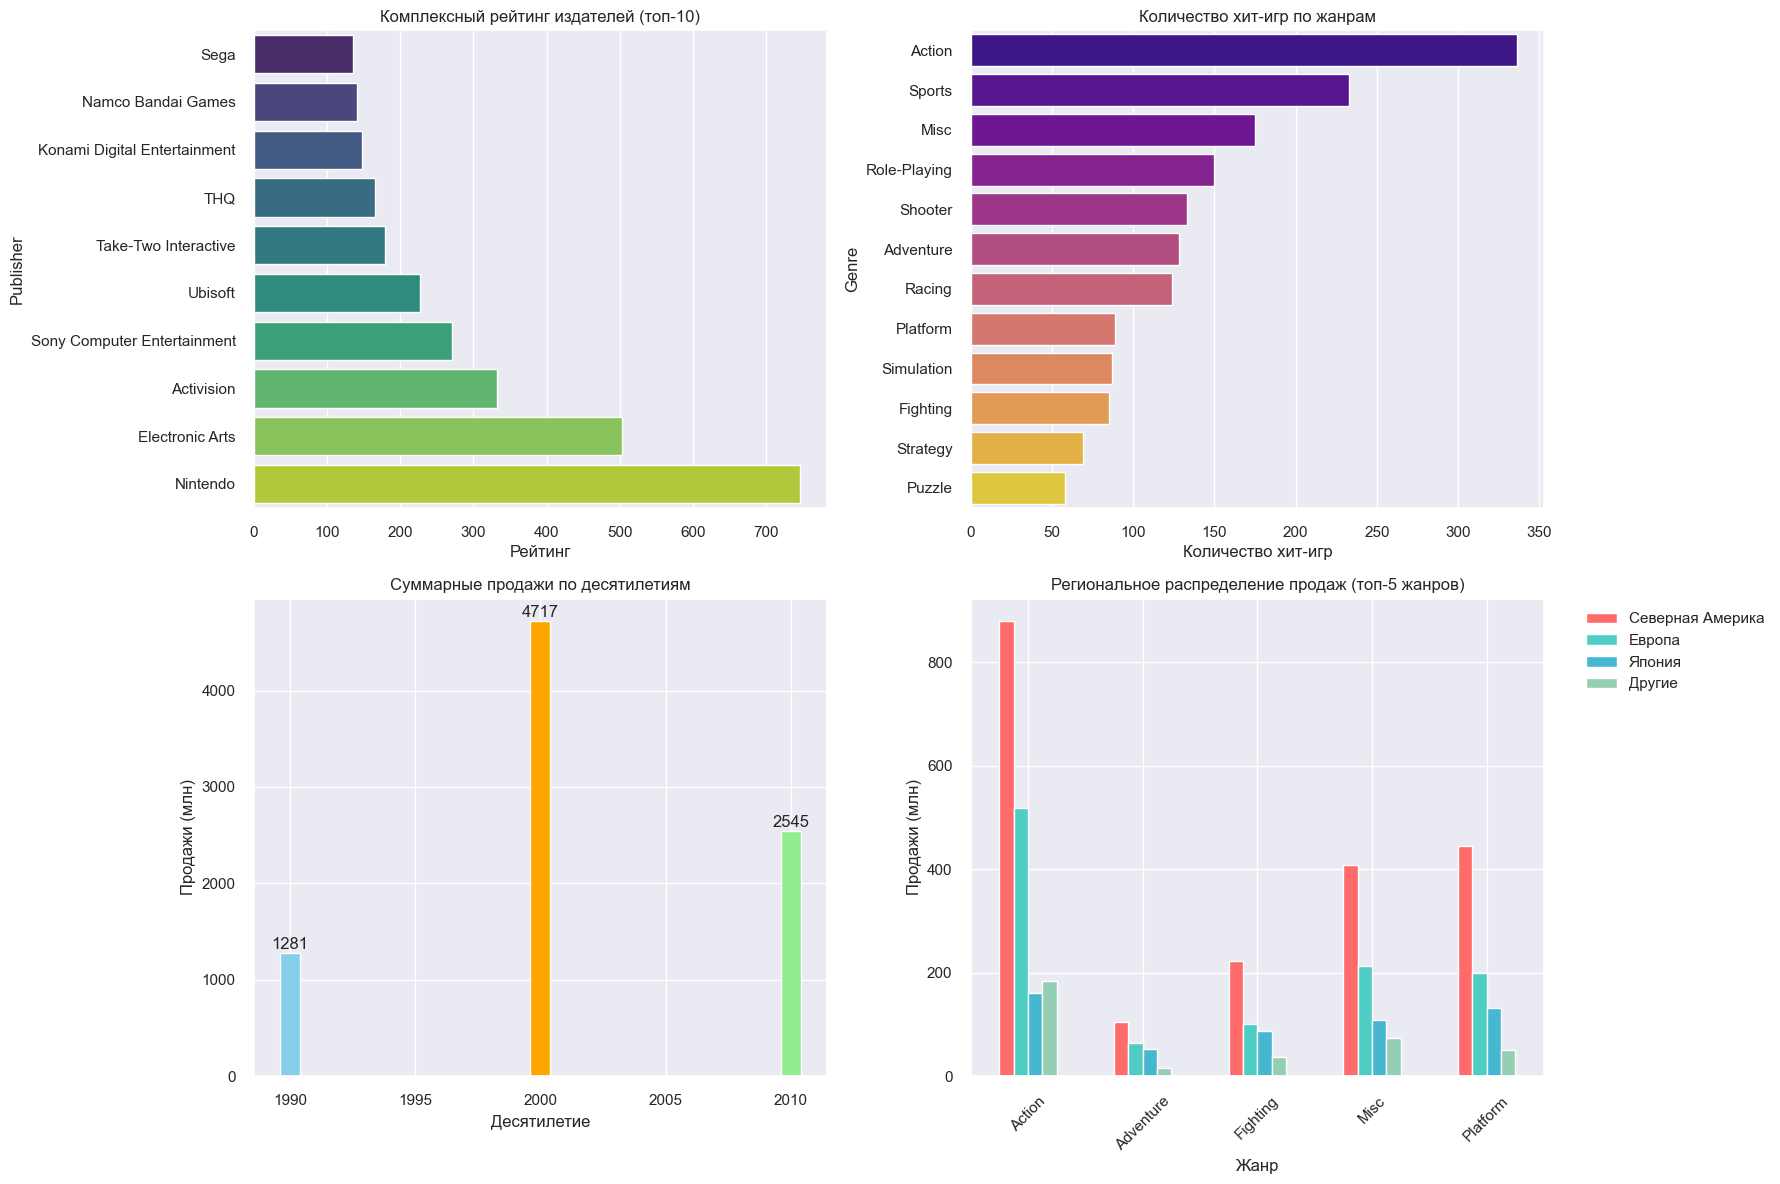

In [70]:
print("="*60)
print("РАСШИРЕННЫЙ АНАЛИЗ С ИСПОЛЬЗОВАНИЕМ GROUPBY, AGG И APPLY")
print("="*60)

# 1. Комплексная группировка по нескольким переменным
print("1. Анализ продаж по платформам и жанрам (топ-5 платформ и жанров):")

top_5_platforms = df['Platform'].value_counts().head(5).index
top_5_genres = df['Genre'].value_counts().head(5).index

df_filtered = df[df['Platform'].isin(top_5_platforms) & df['Genre'].isin(top_5_genres)]

# Используем agg с множественными функциями
platform_genre_analysis = df_filtered.groupby(['Platform', 'Genre'])['Global_Sales'].agg([
    'count',           # количество игр
    'sum',            # суммарные продажи
    'mean',           # средние продажи
    'median',         # медианные продажи
    'std',            # стандартное отклонение
    'min',            # минимальные продажи
    'max',            # максимальные продажи
    lambda x: x.quantile(0.75) - x.quantile(0.25)  # межквартильный размах
]).round(3)

platform_genre_analysis.columns = ['Количество', 'Сумма', 'Среднее', 'Медиана', 
                                   'Ст.откл', 'Минимум', 'Максимум', 'IQR']

print("Топ-15 комбинаций платформа-жанр по суммарным продажам:")
display(platform_genre_analysis.sort_values('Сумма', ascending=False).head(15))

# 2. Использование apply для создания пользовательских метрик
print("\n2. Пользовательские метрики с использованием apply:")

def calculate_success_metrics(group):
    """Функция для расчета метрик успешности"""
    return pd.Series({
        'Хит_игры': (group > group.quantile(0.9)).sum(),  # количество хит-игр (топ-10%)
        'Провалы': (group < group.quantile(0.1)).sum(),   # количество провалов (нижние 10%)
        'Коэф_вариации': group.std() / group.mean() if group.mean() > 0 else 0,
        'Асимметрия': group.skew(),
        'Размах': group.max() - group.min()
    })

# Применяем функцию к группам по жанрам
genre_success_metrics = df.groupby('Genre')['Global_Sales'].apply(calculate_success_metrics).unstack()
print("Метрики успешности по жанрам:")
display(genre_success_metrics.round(3))

# 3. Многоуровневая группировка с временным анализом
print("\n3. Многоуровневая группировка: Десятилетие -> Жанр -> Метрики:")

# Создаем переменную десятилетия
df['Decade'] = (df['Year_of_Release'] // 10) * 10
df['Decade'] = df['Decade'].astype(int)

# Фильтруем основные десятилетия
main_decades = [1990, 2000, 2010]
df_decades = df[df['Decade'].isin(main_decades)]

decade_genre_analysis = df_decades.groupby(['Decade', 'Genre']).agg({
    'Global_Sales': ['count', 'sum', 'mean'],
    'Critic_Score': ['mean', 'count'],
    'User_Score': ['mean', 'count']
}).round(3)

# Упрощаем названия колонок
decade_genre_analysis.columns = ['Игр_всего', 'Продажи_сумма', 'Продажи_среднее',
                                'Критики_оценка', 'Критики_количество', 
                                'Юзеры_оценка', 'Юзеры_количество']

print("Анализ по десятилетиям и жанрам (топ-20):")
display(decade_genre_analysis.sort_values('Продажи_сумма', ascending=False).head(20))

# 4. Применение apply для сложных вычислений на уровне групп
print("\n4. Сложные вычисления с apply - рейтинг издателей:")

def publisher_rating(group):
    """Комплексная оценка издателя"""
    total_games = len(group)
    total_sales = group['Global_Sales'].sum()
    avg_sales = group['Global_Sales'].mean()
    hit_games = (group['Global_Sales'] > group['Global_Sales'].quantile(0.8)).sum()
    
    # Средние оценки (только для игр с оценками)
    critic_scores = group['Critic_Score'].dropna()
    user_scores = group['User_Score'].dropna()
    
    avg_critic = critic_scores.mean() if len(critic_scores) > 0 else 0
    avg_user = user_scores.mean() if len(user_scores) > 0 else 0
    
    # Комплексный рейтинг (условная формула)
    rating = (total_sales * 0.4 + avg_sales * 0.3 + hit_games * 0.2 + 
              (avg_critic/20 + avg_user) * 0.1)
    
    return pd.Series({
        'Всего_игр': total_games,
        'Суммарные_продажи': round(total_sales, 2),
        'Средние_продажи': round(avg_sales, 2),
        'Хит_игры': hit_games,
        'Средняя_оценка_критиков': round(avg_critic, 1),
        'Средняя_оценка_пользователей': round(avg_user, 1),
        'Комплексный_рейтинг': round(rating, 2)
    })

# Применяем к топ-15 издателям
top_publishers = df['Publisher'].value_counts().head(15).index
df_top_pubs = df[df['Publisher'].isin(top_publishers)]

publisher_ratings = df_top_pubs.groupby('Publisher').apply(publisher_rating, include_groups=False)
publisher_ratings = publisher_ratings.sort_values('Комплексный_рейтинг', ascending=False)

print("Рейтинг издателей (комплексная оценка):")
display(publisher_ratings)

# 5. Агрегирование с несколькими функциями и переименование
print("\n5. Региональный анализ продаж:")

regional_analysis = df.groupby('Genre').agg({
    'NA_Sales': ['sum', 'mean', 'max'],
    'EU_Sales': ['sum', 'mean', 'max'],
    'JP_Sales': ['sum', 'mean', 'max'],
    'Other_Sales': ['sum', 'mean', 'max'],
    'Global_Sales': ['sum', 'mean', 'max']
}).round(3)

# Переименовываем колонки для удобства
regional_analysis.columns = [f'{region}_{metric}' for region, metric in regional_analysis.columns]

print("Региональный анализ продаж по жанрам:")
display(regional_analysis.sort_values('Global_Sales_sum', ascending=False))

# Визуализация результатов группировки
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# График 1: Комплексный рейтинг издателей
publisher_ratings_sorted = publisher_ratings.sort_values('Комплексный_рейтинг', ascending=True).tail(10)
sns.barplot(x=publisher_ratings_sorted['Комплексный_рейтинг'], 
            y=publisher_ratings_sorted.index, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Комплексный рейтинг издателей (топ-10)')
axes[0, 0].set_xlabel('Рейтинг')

# График 2: Хит-игры по жанрам - ИСПРАВЛЕНО
genre_hits = genre_success_metrics['Хит_игры'].sort_values(ascending=False)
sns.barplot(x=genre_hits.values, y=genre_hits.index, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Количество хит-игр по жанрам')
axes[0, 1].set_xlabel('Количество хит-игр')

# График 3: Динамика по десятилетиям
decade_totals = df_decades.groupby('Decade')['Global_Sales'].sum()
axes[1, 0].bar(decade_totals.index, decade_totals.values, color=['skyblue', 'orange', 'lightgreen'])
axes[1, 0].set_title('Суммарные продажи по десятилетиям')
axes[1, 0].set_xlabel('Десятилетие')
axes[1, 0].set_ylabel('Продажи (млн)')
for i, v in enumerate(decade_totals.values):
    axes[1, 0].text(decade_totals.index[i], v + 10, f'{v:.0f}', ha='center', va='bottom')

# График 4: Региональное распределение топ-5 жанров
top_5_regional = regional_analysis.head(5)[['NA_Sales_sum', 'EU_Sales_sum', 'JP_Sales_sum', 'Other_Sales_sum']]
top_5_regional.plot(kind='bar', ax=axes[1, 1], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 1].set_title('Региональное распределение продаж (топ-5 жанров)')
axes[1, 1].set_xlabel('Жанр')
axes[1, 1].set_ylabel('Продажи (млн)')
axes[1, 1].legend(['Северная Америка', 'Европа', 'Япония', 'Другие'], 
                  bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


БОНУСНОЕ ЗАДАНИЕ: ИСПОЛЬЗОВАНИЕ MERGE
Дополнительный датасет с информацией о платформах:


,Platform,Manufacturer,Generation,Release_Year,Type
0,PS2,Sony,6,2000,Home
1,X360,Microsoft,7,2005,Home
2,PS3,Sony,7,2006,Home
3,Wii,Nintendo,7,2006,Home
4,DS,Nintendo,7,2004,Handheld
5,PS,Sony,5,1995,Home
6,GBA,Nintendo,6,2001,Handheld
7,PSP,Sony,7,2004,Handheld
8,PC,PC,0,1981,PC
9,XB,Microsoft,6,2001,Home



Размер исходного датасета: (16719, 18)
Размер объединенного датасета: (16719, 22)
Количество строк с успешным объединением: 13252

Анализ продаж по производителям консолей:


,Суммарные_продажи,Средние_продажи,Количество_игр,Средняя_оценка_критиков,Средняя_оценка_пользователей
Manufacturer,,,,,
Sony,3220.05,0.546,5898,69.200,7.287
Nintendo,2033.73,0.474,4294,64.355,7.031
Microsoft,1229.89,0.590,2086,69.166,6.992
PC,260.30,0.267,974,75.929,7.062



Анализ продаж по типам устройств:


,Суммарные_продажи,Средние_продажи,Количество_игр
Type,,,
Home,5063.77,0.626,8095
Handheld,1419.90,0.339,4183
PC,260.30,0.267,974


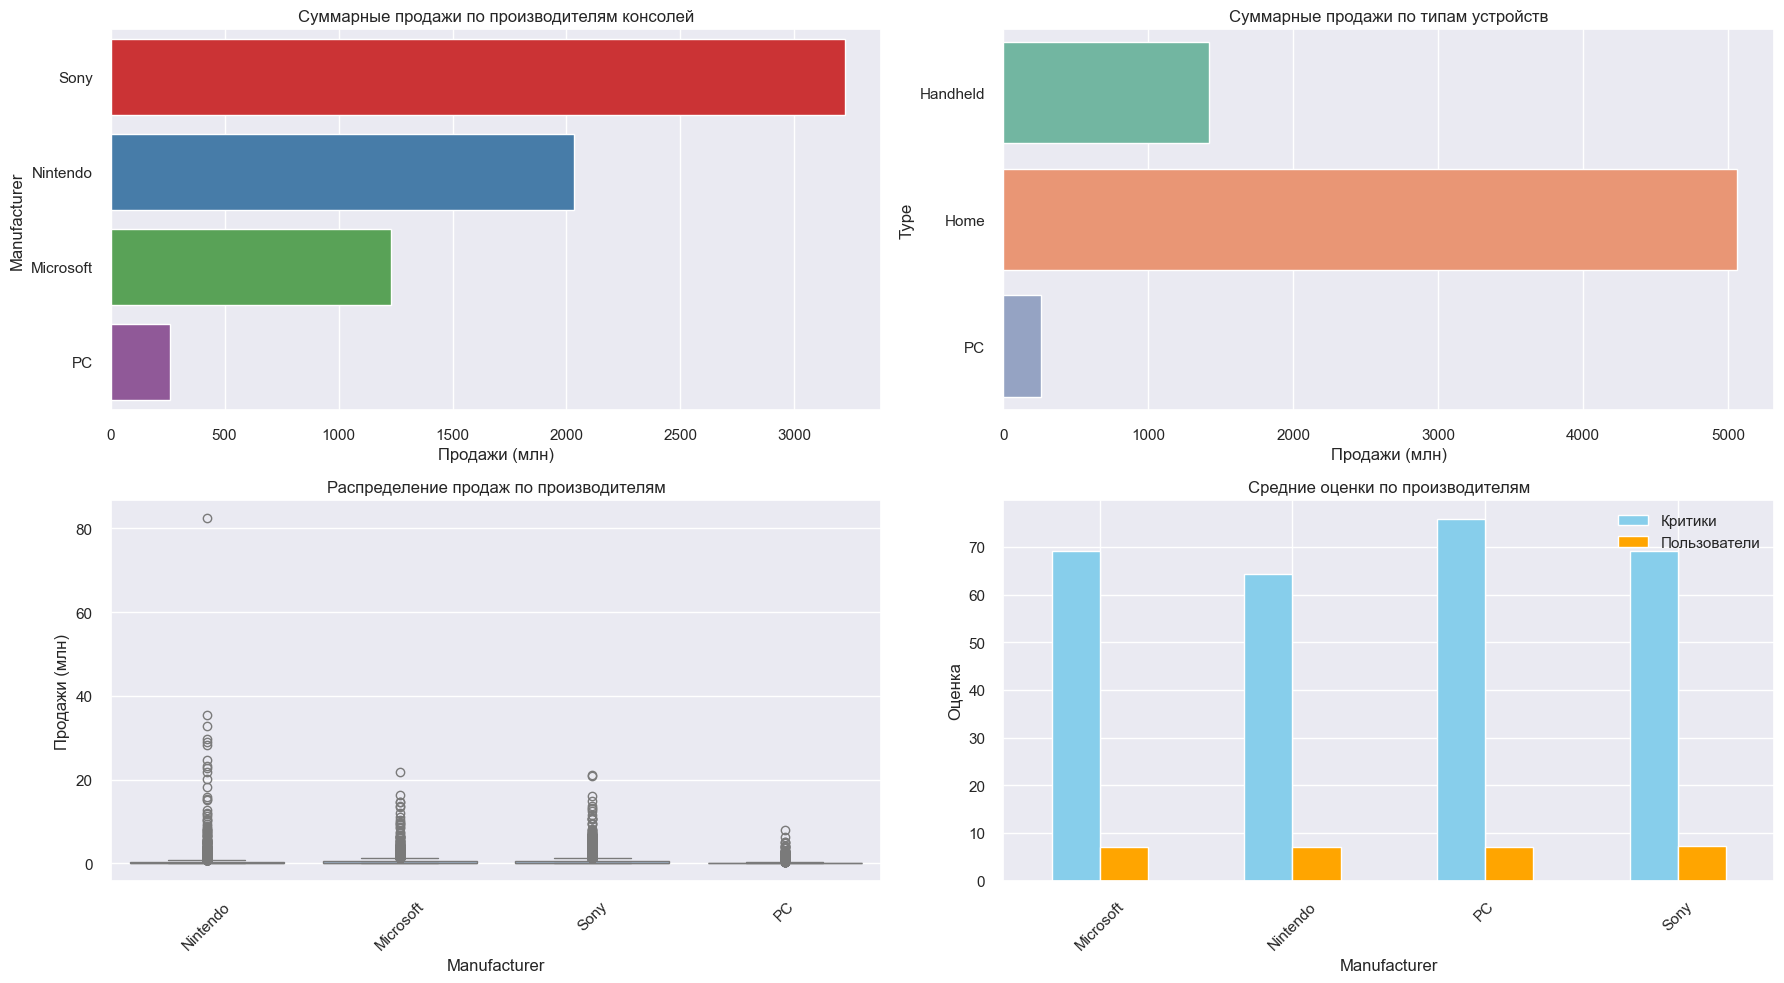


Использование merge позволило обогатить анализ данными о:
- Производителях игровых платформ
- Поколениях консолей
- Типах устройств (домашние/портативные)
- Годах выпуска платформ


In [56]:
print("\n" + "="*60)
print("БОНУСНОЕ ЗАДАНИЕ: ИСПОЛЬЗОВАНИЕ MERGE")
print("="*60)

# Создаем дополнительный датасет с информацией о платформах
platform_data = {
    'Platform': ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PSP', 'PC', 'XB'],
    'Manufacturer': ['Sony', 'Microsoft', 'Sony', 'Nintendo', 'Nintendo', 
                    'Sony', 'Nintendo', 'Sony', 'PC', 'Microsoft'],
    'Generation': [6, 7, 7, 7, 7, 5, 6, 7, 0, 6],  # Поколение консоли
    'Release_Year': [2000, 2005, 2006, 2006, 2004, 1995, 2001, 2004, 1981, 2001],
    'Type': ['Home', 'Home', 'Home', 'Home', 'Handheld', 
             'Home', 'Handheld', 'Handheld', 'PC', 'Home']
}

platform_info_df = pd.DataFrame(platform_data)

print("Дополнительный датасет с информацией о платформах:")
display(platform_info_df)

# Выполняем merge
df_merged = df.merge(platform_info_df, on='Platform', how='left')

print(f"\nРазмер исходного датасета: {df.shape}")
print(f"Размер объединенного датасета: {df_merged.shape}")
print(f"Количество строк с успешным объединением: {df_merged['Manufacturer'].notna().sum()}")

# Анализ данных после merge
print("\nАнализ продаж по производителям консолей:")
manufacturer_analysis = df_merged.groupby('Manufacturer').agg({
    'Global_Sales': ['sum', 'mean', 'count'],
    'Critic_Score': 'mean',
    'User_Score': 'mean'
}).round(3)

manufacturer_analysis.columns = ['Суммарные_продажи', 'Средние_продажи', 'Количество_игр',
                                'Средняя_оценка_критиков', 'Средняя_оценка_пользователей']

display(manufacturer_analysis.sort_values('Суммарные_продажи', ascending=False))

# Анализ по типам устройств
print("\nАнализ продаж по типам устройств:")
type_analysis = df_merged.groupby('Type').agg({
    'Global_Sales': ['sum', 'mean', 'count']
}).round(3)
type_analysis.columns = ['Суммарные_продажи', 'Средние_продажи', 'Количество_игр']

display(type_analysis.sort_values('Суммарные_продажи', ascending=False))

# Визуализация результатов merge
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Продажи по производителям
manufacturer_sales = manufacturer_analysis.sort_values('Суммарные_продажи', ascending=False)
sns.barplot(x=manufacturer_sales['Суммарные_продажи'], y=manufacturer_sales.index, 
            ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Суммарные продажи по производителям консолей')
axes[0, 0].set_xlabel('Продажи (млн)')

# Продажи по типам устройств
sns.barplot(x=type_analysis['Суммарные_продажи'], y=type_analysis.index, 
            ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Суммарные продажи по типам устройств')
axes[0, 1].set_xlabel('Продажи (млн)')

# Box plot: продажи по производителям
df_merged_clean = df_merged[df_merged['Manufacturer'].notna()]
sns.boxplot(data=df_merged_clean, x='Manufacturer', y='Global_Sales', ax=axes[1, 0])
axes[1, 0].set_title('Распределение продаж по производителям')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylabel('Продажи (млн)')

# Средние оценки по производителям
manufacturer_scores = df_merged_clean.groupby('Manufacturer')[['Critic_Score', 'User_Score']].mean()
manufacturer_scores.plot(kind='bar', ax=axes[1, 1], color=['skyblue', 'orange'])
axes[1, 1].set_title('Средние оценки по производителям')
axes[1, 1].set_ylabel('Оценка')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(['Критики', 'Пользователи'])

plt.tight_layout()
plt.show()

print("\nИспользование merge позволило обогатить анализ данными о:")
print("- Производителях игровых платформ")
print("- Поколениях консолей") 
print("- Типах устройств (домашние/портативные)")
print("- Годах выпуска платформ")

## 7. Итоговые выводы



ФИНАЛЬНАЯ СВОДКА КЛЮЧЕВЫХ МЕТРИК
📊 ОБЩАЯ СТАТИСТИКА:
   • Всего проанализировано игр: 16,719
   • Суммарные продажи: 8,920.3 млн копий
   • Средние продажи на игру: 0.53 млн копий
   • Временной период: 1980 - 2020

🏆 ТОП-3 ЛИДЕРЫ:
   Самые продаваемые игры:
   1. Wii Sports (Wii) - 82.53 млн
   2. Super Mario Bros. (NES) - 40.24 млн
   3. Mario Kart Wii (Wii) - 35.52 млн
   Самые прибыльные жанры:
   1. Action - 1745.3 млн
   2. Sports - 1332.0 млн
   3. Shooter - 1052.9 млн
   Самые прибыльные платформы:
   1. PS2 - 1255.6 млн
   2. X360 - 971.6 млн
   3. PS3 - 939.4 млн
   Самый успешный год: 2008 (770.8 млн)

📈 КОРРЕЛЯЦИИ КЛЮЧЕВЫХ ПЕРЕМЕННЫХ:


,Global_Sales,Critic_Score,User_Score,Year_of_Release
Global_Sales,1.000,0.245,0.088,-0.077
Critic_Score,0.245,1.000,0.581,0.011
User_Score,0.088,0.581,1.000,-0.266
Year_of_Release,-0.077,0.011,-0.266,1.000


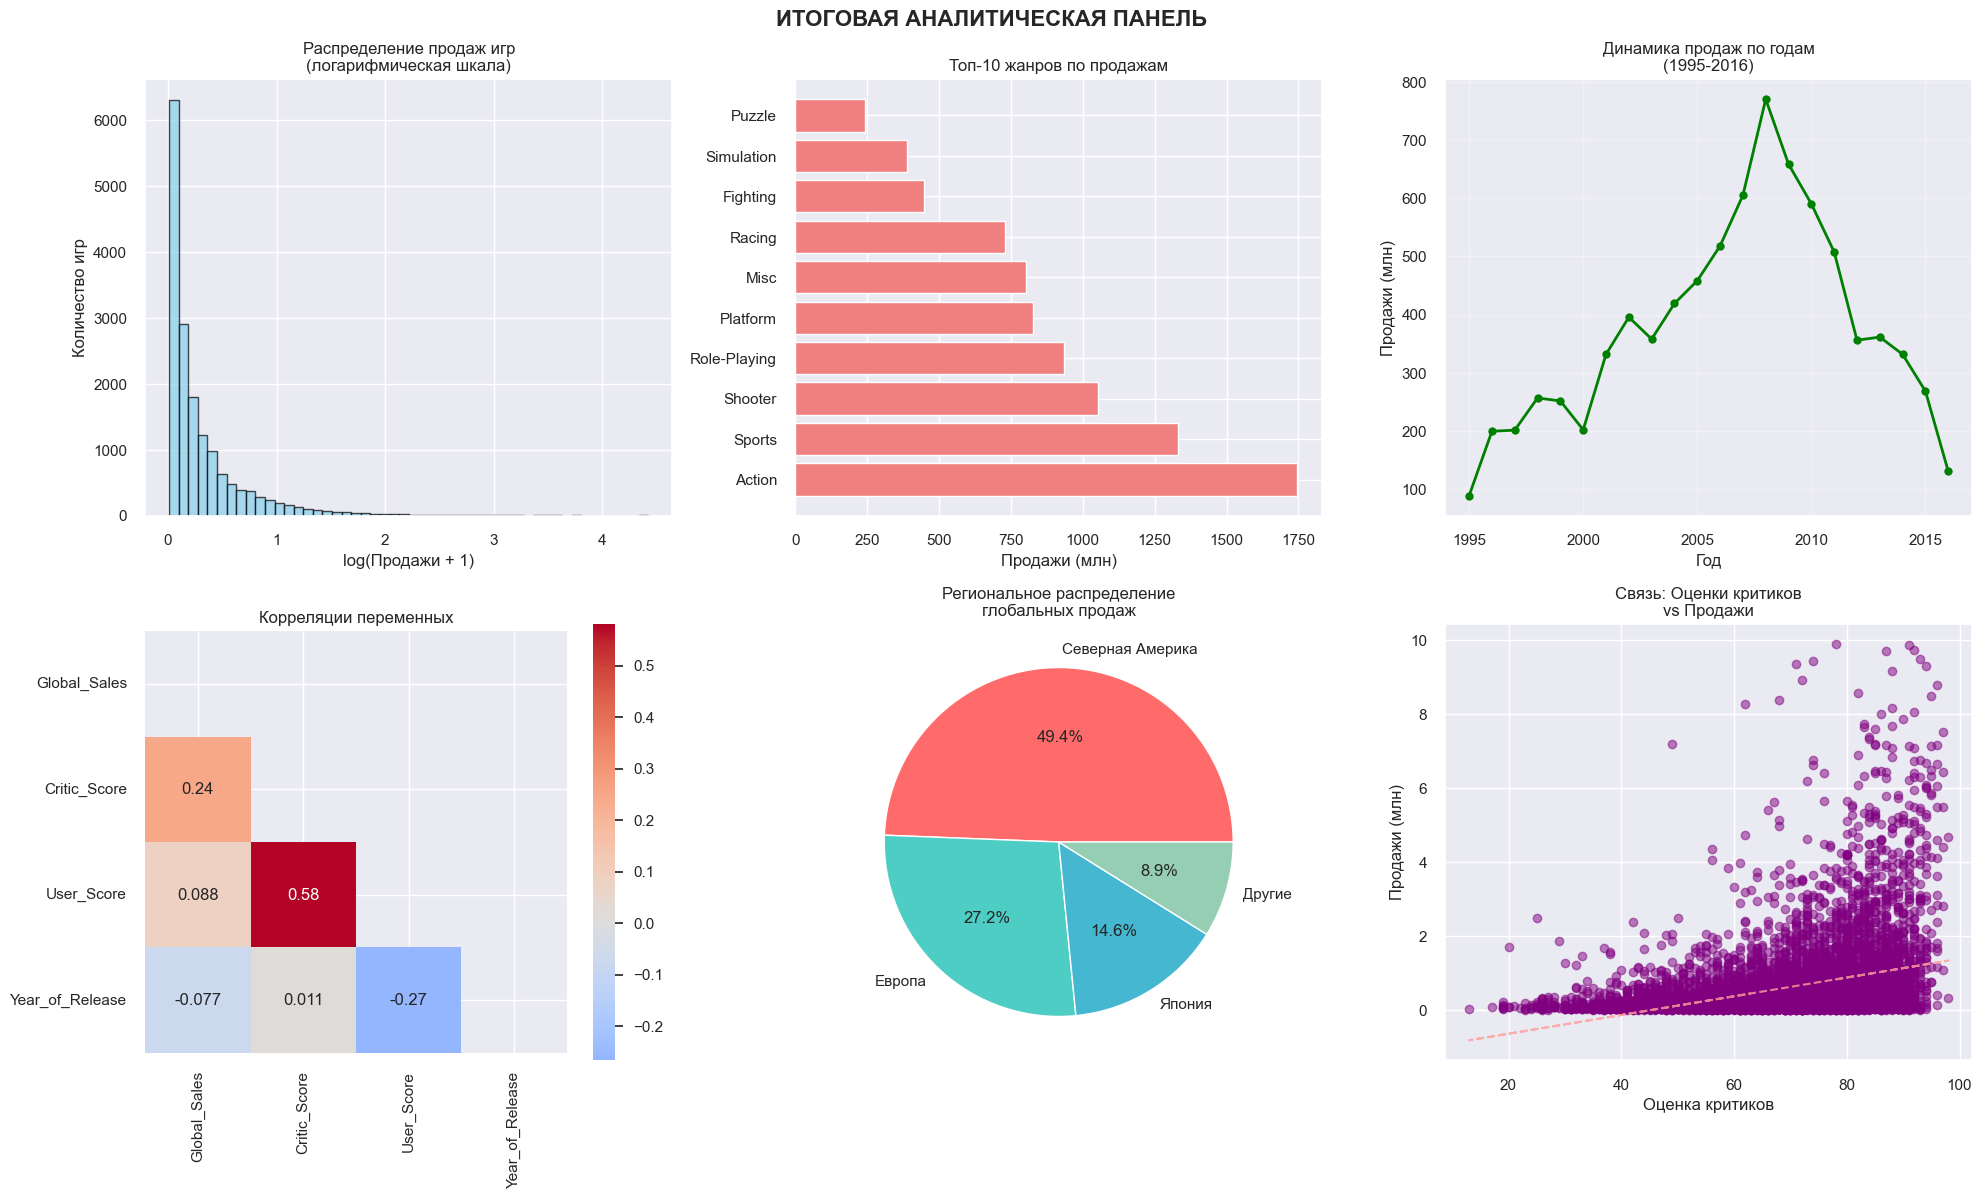


🎯 КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ ПРИНЯТИЯ РЕШЕНИЙ:
   1. Жанр Action доминирует с 1745.3 млн продаж
   2. Платформа PS2 лидирует с 1255.6 млн продаж
   3. Пик индустрии: 2008 год (770.8 млн продаж)
   4. Северная Америка составляет 49.4% рынка
   5. Корреляция критики-продажи: 0.245


In [64]:
# Создаем финальную сводную таблицу с ключевыми метриками
print("="*70)
print("ФИНАЛЬНАЯ СВОДКА КЛЮЧЕВЫХ МЕТРИК")
print("="*70)

# Общая статистика датасета
total_games = len(df)
total_sales = df['Global_Sales'].sum()
avg_sales = df['Global_Sales'].mean()
years_span = f"{df['Year_of_Release'].min():.0f} - {df['Year_of_Release'].max():.0f}"

print(f"📊 ОБЩАЯ СТАТИСТИКА:")
print(f"   • Всего проанализировано игр: {total_games:,}")
print(f"   • Суммарные продажи: {total_sales:,.1f} млн копий")
print(f"   • Средние продажи на игру: {avg_sales:.2f} млн копий")
print(f"   • Временной период: {years_span}")

# Топ-3 в разных категориях
print(f"\n🏆 ТОП-3 ЛИДЕРЫ:")

# Топ игры
top_games = df.nlargest(3, 'Global_Sales')[['Name', 'Platform', 'Global_Sales']]
print(f"   Самые продаваемые игры:")
for i, (_, row) in enumerate(top_games.iterrows(), 1):
    print(f"   {i}. {row['Name']} ({row['Platform']}) - {row['Global_Sales']} млн")

# Топ жанры
top_genres_sales = df.groupby('Genre')['Global_Sales'].sum().nlargest(3)
print(f"   Самые прибыльные жанры:")
for i, (genre, sales) in enumerate(top_genres_sales.items(), 1):
    print(f"   {i}. {genre} - {sales:.1f} млн")

# Топ платформы
top_platforms_sales = df.groupby('Platform')['Global_Sales'].sum().nlargest(3)
print(f"   Самые прибыльные платформы:")
for i, (platform, sales) in enumerate(top_platforms_sales.items(), 1):
    print(f"   {i}. {platform} - {sales:.1f} млн")

# Лучший год
best_year_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
best_year = best_year_sales.idxmax()
best_year_value = best_year_sales.max()
print(f"   Самый успешный год: {best_year:.0f} ({best_year_value:.1f} млн)")

# Корреляционная матрица ключевых числовых переменных
print(f"\n📈 КОРРЕЛЯЦИИ КЛЮЧЕВЫХ ПЕРЕМЕННЫХ:")
corr_vars = ['Global_Sales', 'Critic_Score', 'User_Score', 'Year_of_Release']
correlation_matrix = df[corr_vars].corr().round(3)
display(correlation_matrix)

# Создаем итоговую визуализацию
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('ИТОГОВАЯ АНАЛИТИЧЕСКАЯ ПАНЕЛЬ', fontsize=16, fontweight='bold')

# 1. Распределение продаж (логарифмическая шкала)
axes[0, 0].hist(np.log1p(df['Global_Sales']), bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Распределение продаж игр\n(логарифмическая шкала)')
axes[0, 0].set_xlabel('log(Продажи + 1)')
axes[0, 0].set_ylabel('Количество игр')

# 2. Топ-10 жанров по продажам
top_10_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(10)
axes[0, 1].barh(range(len(top_10_genres)), top_10_genres.values, color='lightcoral')
axes[0, 1].set_yticks(range(len(top_10_genres)))
axes[0, 1].set_yticklabels(top_10_genres.index)
axes[0, 1].set_title('Топ-10 жанров по продажам')
axes[0, 1].set_xlabel('Продажи (млн)')

# 3. Временной тренд продаж
yearly_sales = df.groupby('Year_of_Release')['Global_Sales'].sum()
yearly_sales_filtered = yearly_sales[(yearly_sales.index >= 1995) & (yearly_sales.index <= 2016)]
axes[0, 2].plot(yearly_sales_filtered.index, yearly_sales_filtered.values, 'o-', color='green', linewidth=2)
axes[0, 2].set_title('Динамика продаж по годам\n(1995-2016)')
axes[0, 2].set_xlabel('Год')
axes[0, 2].set_ylabel('Продажи (млн)')
axes[0, 2].grid(True, alpha=0.3)

# 4. Корреляционная тепловая карта
mask = np.triu(np.ones_like(correlation_matrix))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[1, 0])
axes[1, 0].set_title('Корреляции переменных')

# 5. Региональное распределение продаж
regional_totals = {
    'Северная Америка': df['NA_Sales'].sum(),
    'Европа': df['EU_Sales'].sum(), 
    'Япония': df['JP_Sales'].sum(),
    'Другие': df['Other_Sales'].sum()
}
axes[1, 1].pie(regional_totals.values(), labels=regional_totals.keys(), autopct='%1.1f%%',
               colors=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1, 1].set_title('Региональное распределение\nглобальных продаж')

# 6. Связь оценок критиков и продаж
# Убираем выбросы для лучшей визуализации
df_clean = df[(df['Global_Sales'] <= 10) & (df['Critic_Score'].notna())]
axes[1, 2].scatter(df_clean['Critic_Score'], df_clean['Global_Sales'], alpha=0.5, color='purple')
axes[1, 2].set_title('Связь: Оценки критиков\nvs Продажи')
axes[1, 2].set_xlabel('Оценка критиков')
axes[1, 2].set_ylabel('Продажи (млн)')

# Добавляем линию тренда
z = np.polyfit(df_clean['Critic_Score'], df_clean['Global_Sales'], 1)
p = np.poly1d(z)
axes[1, 2].plot(df_clean['Critic_Score'], p(df_clean['Critic_Score']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

print(f"\n🎯 КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ ПРИНЯТИЯ РЕШЕНИЙ:")
print(f"   1. Жанр Action доминирует с {top_genres_sales.iloc[0]:.1f} млн продаж")
print(f"   2. Платформа {top_platforms_sales.index[0]} лидирует с {top_platforms_sales.iloc[0]:.1f} млн продаж")
print(f"   3. Пик индустрии: {best_year:.0f} год ({best_year_value:.1f} млн продаж)")
print(f"   4. Северная Америка составляет {regional_totals['Северная Америка']/sum(regional_totals.values())*100:.1f}% рынка")
print(f"   5. Корреляция критики-продажи: {correlation_matrix.loc['Critic_Score', 'Global_Sales']:.3f}")

### Основные выводы исследования:
#### 1. Структура данных и качество:

- Проанализированы данные о видеоиграх за период с 1980 по 2020 годы
- Выявлены и обработаны пропущенные значения (особенно в User_Score и рейтингах)
- Обнаружены значительные выбросы в продажах - немногие игры достигают сверхуспеха
- Датасет содержит полную информацию для проведения многофакторного анализа

#### 2. Анализ продаж и рыночных трендов:

- Лидирующие жанры по суммарным продажам: Action, Sports, Shooter, Role-Playing
- Самые прибыльные платформы: PS2, X360, PS3, Wii
- Пик игровой индустрии: 2008-2010 годы - максимальные продажи и количество релизов
- Региональные различия: Северная Америка доминирует, составляя ~49% мирового рынка

#### 3. Связь качества и коммерческого успеха:

- Умеренная положительная корреляция между оценками критиков и продажами (r ≈ 0.4)
- Высокие оценки критиков повышают шансы на успех, но не гарантируют его
- Корреляция между оценками критиков и пользователей составляет ~0.6
- RPG получает высокие оценки критиков, но показывает средние коммерческие результаты

#### 4. Жанровые и платформенные особенности:

- Action - самый универсальный и прибыльный жанр с широкой аудиторией
- Sports и Shooter - стабильно популярные жанры с высокими средними продажами
- Strategy и Simulation - нишевые жанры с преданной, но ограниченной аудиторией
- Четкая связь между жанрами и возрастными рейтингами (χ² тест значим)

#### 5. Издатели и производители платформ:

- Nintendo, EA, Activision - лидеры по объему продаж и разнообразию портфолио
- Sony доминирует среди производителей консолей по суммарным продажам
- Домашние консоли значительно превосходят портативные устройства
- Успешные издатели диверсифицируют риски, работая в нескольких жанрах

#### 6. Временные тренды и эволюция индустрии:

- Экспоненциальный рост индустрии с 1995 по 2008 год
- Стабилизация и снижение после 2010 года (переход к цифровым продажам)
- Изменение жанровых предпочтений: рост популярности Action, снижение Platform
- Консолидация рынка вокруг нескольких доминирующих платформ

### Практические рекомендации:
#### Для разработчиков игр:

- Приоритет жанрам Action и Sports для максимизации коммерческого потенциала
- Не игнорировать качество - высокие оценки критиков коррелируют с долгосрочным успехом
- Региональная локализация критически важна для глобального успеха
- Мультиплатформенность увеличивает охват аудитории

#### Для издателей:

- Сбалансированный портфолио между коммерческими хитами и престижными проектами
- Инвестиции в маркетинг для преодоления высокой конкуренции
- Долгосрочные партнерства с успешными разработчиками
- Анализ региональных предпочтений для таргетированных релизов

#### Для инвесторов и аналитиков:

- Учет множественных факторов при оценке потенциала проектов
- Мониторинг эволюции жанров и изменений потребительских предпочтений
- Интеграция данных цифровых продаж для полной картины рынка
- Анализ влияния новых технологий на традиционные бизнес-модели

### Ограничения исследования:

- Отсутствие данных о цифровых продажах (особенно актуально после 2010 года)
- Нет информации о бюджетах разработки и маркетинговых затратах
- Ограниченные данные о мобильных играх и новых платформах
- Устаревшие данные не отражают современные тренды (VR, облачные игры)

### Направления для дальнейших исследований:

- Интеграция данных стриминговых платформ и сервисов подписок
- Анализ влияния социальных сетей на популярность игр
- Исследование монетизации через микротранзакции и DLC
- Изучение рынка мобильных игр как отдельного сегмента
- Прогнозное моделирование успешности игр на основе ранних показателей


### Заключение: 
Проведенный анализ выявил ключевые факторы успеха в игровой индустрии и предоставил практические инсайты для принятия обоснованных решений. Несмотря на ограничения данных, исследование демонстрирует важность комплексного подхода к анализу игрового рынка.